<h1 style="text-align: center;">📘 LSA Indonesia Data Processing and Analysis</h1>

This notebook documents the process of preparing and analyzing data collected from the **Life Skills Assessment (LSA)** conducted in **Indonesia**. The LSA was administered in two distinct cohorts: **Year 1** and **Year 2**, with each year including data collected **before (Pre)** and **after (Post)** the training interventions.

The aim of this analysis is to:

- Conduct a **descriptive analysis**
- Evaluate changes in participant outcomes — specifically in **Life Skills**, **Employability**, and **Growth Mindset**
- Determine whether these changes are **statistically significant**

---

## 🧭 Notebook Structure

This notebook is organized into the following major components:

✅ **Data Import & Preparation**  
Four datasets (Y1 Pre/Post and Y2 Pre/Post) are imported. They have been initially cleaned in Excel to ensure:
- Uniform column structure
- Translated headers
- Removal of personally identifiable information (PII)
- Removal of calculated fields

✅ **Structural and Type Validation**  
We confirm that all datasets have the same **column structure** and **data types** to enable safe merging.

✅ **Data Merging**  
The four datasets are combined into a single structured dataset for unified analysis.

Composite Score for the three domains are constructed according to the LSA manual 

evant questionnaire items.

✅ **Descriptive & Inferential Analysis**  
Pre/Post score distributions are visualized using **histograms and KDE plots**.  
The **Wilcoxon signed-rank test** is applied to assess statistical significance of changes over time.

✅ **Correlation and Regression Analysis**  
We explore relationships between changes in Life Skills and Employability scores to assess whether improvements in one area are associated with gains in another.

---

## 🛠️ Tools & Libraries Used

This analysis uses the following Python libraries:

- `pandas` – data manipulation and transformation  
- `matplotlib` & `seaborn` – data visualization  
- `scipy.stats` – statistical testing and inference

--- Indonesia.


## 📌 Summary of Main Findings
---

###  Life Skills Score

- **Year 1**:  
The  Proportion of youth who improved life skills  socre in year 1 is  55.44% (using pre-post score difference method). There was a **statistically significant improvement** in life skill scores between pre and post. The mean increased from 99.18 to 101.63, and the median and upper percentiles also rose. The histogram showed a clear **rightward shift**, indicating a positive impact from the intervention. However, variability increased post-training, and a few outliers were observed on the lower end.

- **Year 2**:
The  proportion of youth who improved life skills  socre in year 2 is 45.28% (using pre-post score difference method). Life skill scores showed a **small but statistically significant decrease** between pre and post (mean dropped from 102.4 to 100.95). The median also declined slightly, and the histogram revealed a **leftward shift** in the distribution. This suggests that the program's effectiveness may have been lower in Year 2, possibly due to contextual or implementation factors.



### Employability Score

- **Year 1**:  
  The proportion of youth who improved employability socre in year 1is  46.23% (using pre-post score difference method). A **modest increase** in employability scores was observed (mean rose from 35.29 to 35.72) between pre and post, and the change was statistically significant. The distribution shifted slightly to the right with minor increases in variability, indicating some positive effects of the training.

- **Year 2**:  The proportion of youth who improved employability socre in year 2 is 33.22% (using pre-post score difference method). the   Scores **declined significantly** after the intervention (mean dropped from 37.20 to 35.74). The distribution flattened and shifted left, and the decrease was statistically confirmed by the Wilcoxon test. This may reflect reduced training effectiveness or participant differences in Year 2.


### Improvement in Year 1: Post–Pre Score Difference vs. Confidence Interval Method

In the Year 1 analysis, we used two methods to assess improvement in youth outcomes: the post–pre score difference method and the confidence interval (CI) method. Using the post–pre score difference method,  As note above, we found that 55% of youth improved their life skills scores, while the CI method showed that only 16% had a statistically meaningful improvement. Similarly, for the employability score, the post–pre method estimated 46% improvement, compared to just 12.73% when using the CI method. This comparison highlights how the choice of method can significantly influence interpretation. The post–pre method is more sensitive and inclusive of small changes, while the CI method offers a more conservative, but statistically defensible, estimate of true improvement.

### Correlation Between Life Skills and Employability

- **Year 1**:  
  The **Spearman correlation coefficient** between change in life skills and employability was **0.50**, indicating a **moderate positive relationship**. Participants who improved more in life skills also tended to improve in employability.

- **Year 2**:  
  The correlation was slightly stronger at **0.55**, reinforcing the **interconnectedness** between the two domains. Despite the average decline in scores, those who gained in life skills still showed concurrent employability gains.

- **Combined Visual**:  
  A scatterplot with regression lines by year confirmed a **consistent upward trend** between the two scores across both years. Year 2 showed a **broader spread**, highlighting greater variability in participant outcomes.


These findings highlight that while the intervention had **positive effects in Year 1**, its impact was **less consistent in Year 2**, warranting further investigation into implementation quality, participant characteristics, or external factors.


### Growth mindset

- **Year 1**:  
   The proportion of youth who improved growth mindset  socre in year 1 is 49.17%. There was a **statistically significant improvement** in growth mindset scores between pre and post. 

- **Year 2**:  
  The proportion of youth who improved growth mindset  socre in year 2 is 39.86%. Growth scores showed a **small but statistically significant decrease between pre and  post** 

## 📦 1. Creating a single concatenated LSA dataset

---

### Importing the datasets

To created and single dataset on which we will conduct the analysis, we imported four files: the LSA survey conducted in Year 1 before and after the training, and the LSA survey conducted in Year 2 before and after the training.

However, fefore importing in this notebook, each original raw dataset underwent an initial cleaning and restructuring phase in Excel. This process involved removing personally identifiable information (PII), such as name columns, translating and relabeling column headers for clarity (and more aligned to the LSA guideline) while ensuring that the first row remained the header, and removing calculated score columns. Additionally, specific transformations were applied to each dataset to maintain consistency and ensure a uniform structure across all files. You can download the initial cleaned datasets using the link below

https://github.com/naeljb/GG8_FE_Indonesia/blob/main/indonesia_Y1_LSA_pre.csv

https://github.com/naeljb/GG8_FE_Indonesia/blob/main/indonesia_Y1_LSA_post.csv

https://github.com/naeljb/GG8_FE_Indonesia/blob/main/indonesia_y2_LSA_pre.csv

https://github.com/naeljb/GG8_FE_Indonesia/blob/main/indonesia_Y2_LSA_post.csv


For data import, we used the pandas library in Python. The pandas library in Python is a powerful tool for data manipulation and analysis, offering efficient data structures like DataFrames and Series for handling structured data. It provides functionalities for data cleaning, transformation, aggregation, and merging, making it essential for preprocessing and analysis. With pandas, users can easily read and write data from various formats (CSV, Excel, SQL, JSON), handle missing values, reshape datasets, and perform statistical operations.

In [5]:
# importing pandas library
import pandas as pd

In [6]:
#  Providing the File paths for each datasets (currently downloaded,stored in a local machine)
path1 = "D:/S2S_FE/Indonesia_data/indonesia_Y1_LSA_pre.csv"
path2 = "D:/S2S_FE/Indonesia_data/indonesia_Y1_LSA_post.csv"
path3 = "D:/S2S_FE/Indonesia_data/indonesia_y2_LSA_pre.csv"
path4 = "D:/S2S_FE/Indonesia_data/indonesia_Y2_LSA_post.csv"

# Loadingt the  datasets
y1_lsa_pre = pd.read_csv(path1)
y1_lsa_post = pd.read_csv(path2)
y2_lsa_pre = pd.read_csv(path3)
y2_lsa_post = pd.read_csv(path4)

### Validating the consistency of the column structure 

As in this workbook  we also aim to append (concatenate) all datasets into a single dataset, it is essential to ensure consistency across all datasets before appending.  We will  validates the structural consistency of four datasets: Y1_LSA_Pre, Y1_LSA_Post, Y2_LSA_Pre, and Y2_LSA_Post, which represent survey data collected before and after training in Years 1 and 2. These datasets are stored in a dictionary, where the keys are dataset names, and the values are the corresponding DataFrames. The script first prints the shape (number of rows and columns) of each dataset along with the first five column names to provide an overview of their structures. It then checks whether all datasets have the same set of column names by creating a set for each dataset’s column structure. If all column sets are identical, it confirms that the datasets are consistent and can be safely appended. Otherwise, it raises a warning indicating a mismatch in column structures, which must be resolved before proceeding. This validation step is crucial to prevent errors during data merging and ensure uniformity in the final dataset.

In [8]:
# Validate column consistency
datasets = {
    "Y1_LSA_Pre": y1_lsa_pre,
    "Y1_LSA_Post": y1_lsa_post,
    "Y2_LSA_Pre": y2_lsa_pre,
    "Y2_LSA_Post": y2_lsa_post
}

for name, df in datasets.items():
    print(f"{name}: {df.shape} columns: {list(df.columns[:5])}...")  # Show first 5 columns

# Ensure all datasets have the same columns
column_sets = {name: set(df.columns) for name, df in datasets.items()}
if len(set(map(tuple, column_sets.values()))) == 1:
    print("\n✅ All datasets have the same column structure!")
else:
    print("\n⚠️ Column mismatch detected between datasets!")

Y1_LSA_Pre: (1123, 103) columns: ['respondent', 'date', 'province', 'school', 'id']...
Y1_LSA_Post: (1022, 103) columns: ['respondent', 'date', 'province', 'school', 'id']...
Y2_LSA_Pre: (1123, 103) columns: ['respondent', 'date', 'province', 'school', 'id']...
Y2_LSA_Post: (572, 103) columns: ['respondent', 'date', 'province', 'school', 'id']...

✅ All datasets have the same column structure!


### Validating the data type consistency

We also need to  ensure/check the  consistency in data types across multiple datasets before appending  them into a single dataset.  The script below, creates a DataFrame to store and compare the data types of each column across the four datasets: Y1_LSA_Pre, Y1_LSA_Post, Y2_LSA_Pre, and Y2_LSA_Post. First, the script iterates through each dataset, extracting its data types and converting them to string format for easier storage and comparison. It then consolidates these data types into a new DataFrame called dtype_df, where each column represents a dataset, and each row corresponds to a column name and its associated data type in the dataset. To facilitate further review, the script saves this data type comparison table as a CSV file in the specified directory (D:/S2S_FE/Indonesia_data/column_data_types.csv). Finally, it prints the first 15 rows of this table, allowing us to quickly inspect the consistency of data types across datasets. This step helps identify any discrepancies in data types that may cause issues when merging and analyzing the datasets.

In [10]:
# Create a DataFrame to store column data types
dtype_dict = {}
for name, df in datasets.items():
    dtype_dict[name] = df.dtypes.astype(str)  # Convert data types to string for storage

dtype_df = pd.DataFrame(dtype_dict)

# Save to CSV for review
dtype_df.to_csv("D:/S2S_FE/Indonesia_data/column_data_types.csv", index=True)

# Display first 30 rows of data type table
print(dtype_df.head(15))

                 Y1_LSA_Pre Y1_LSA_Post Y2_LSA_Pre Y2_LSA_Post
respondent           object     float64    float64      object
date                 object      object    float64     float64
province             object      object     object      object
school               object     float64     object      object
id                    int64       int64    float64       int64
gender                int64     float64    float64       int64
grade                 int64      object    float64       int64
field_study          object      object     object      object
understanding_q1      int64       int64    float64       int64
understanding_q2      int64       int64    float64       int64
understanding_q3      int64       int64    float64       int64
understanding_q4      int64       int64    float64       int64
understanding_q5      int64       int64    float64       int64
understanding_q6      int64       int64    float64       int64
understanding_q7      int64       int64    float64     

###  Removing irrelevant columns

Removing irrelevant columns helps streamline the dataset by eliminating unnecessary information, reducing memory usage, and improving processing efficiency. It also ensures that only meaningful variables are retained for analysis, minimizing distractions and potential privacy concerns.This Python script below ensures that unnecessary columns, specifically "respondent" and "date", are removed from all datasets before  later merging them into a single dataset. The script iterates over the four datasets (Y1_LSA_Pre, Y1_LSA_Post, Y2_LSA_Pre, and Y2_LSA_Post) and checks if the columns "respondent" and "date" exist in each dataset. If they are present, they are dropped in place using the drop() function. This step ensures that all datasets have a consistent structure and only retain relevant variables, reducing redundancy and potential privacy concerns before merging.


In [12]:
# dropping respondent and date colunms
for df in [y1_lsa_pre, y1_lsa_post, y2_lsa_pre, y2_lsa_post]:
        df.drop(columns=[col for col in ['respondent', 'date'] if col in df.columns], inplace=True)

### Adding column for diffentiating datasets  

This script below enhances dataset organization by adding two new categorical columns ("year" and "time_lsa") to each dataset. These columns help differentiate data across different years and survey periods, ensuring clarity in subsequent analysis.

The "year" column is added to indicate whether the data belongs to Year 1 or Year 2, while the "time_lsa" column specifies whether the survey was conducted before ("pre") or after ("post") the training. Each dataset is updated accordingly. 

By adding these columns, the script ensures that all datasets can be easily distinguished and analyzed based on year and survey timing, facilitating comparisons and trend analysis after appending.

In [14]:
# Add new columns to y1_lsa_pre for indicating year1 and pre for all rows
y1_lsa_pre["year"] = "year1"
y1_lsa_pre["time_lsa"] = "pre"

# Add new columns to y1_lsa_post for indicating years and post for all rows
y1_lsa_post["year"] = "year1"
y1_lsa_post["time_lsa"] = "post"

# Add new columns to y2_lsa_pre for indicating year2 and pre for all rows
y2_lsa_pre["year"] = "year2"
y2_lsa_pre["time_lsa"] = "pre"

# Add new columns to y2_lsa_post for indicating year2 and post for all rows
y2_lsa_post["year"] = "year2"
y2_lsa_post["time_lsa"] = "post"

### Checking datasets size 

This script below retrieves and displays the sizes of all four datasets. Given the consistency work we have done on the dataset structure, we expect each dataset to have the same number of columns. Additionally, since the pre- and post-surveys are conducted as part of a panel survey, we anticipate that the number of rows in the pre- and post-survey datasets will be the same. The script creates a dictionary called dataset_sizes, where each dataset's name is mapped to its shape (number of rows and columns). It then prints a summary of the dataset sizes, specifying the number of rows and columns for each dataset. This step helps identify discrepancies in dataset dimensions, ensuring that all datasets are correctly formatted and aligned before merging. It also allows for early detection of missing data or unexpected variations in dataset sizes, which could indicate data collection issues or inconsistencies in the panel structure.

In [16]:
# Get dataset sizes
dataset_sizes = {name: df.shape for name, df in {
    "Y1_LSA_Pre": y1_lsa_pre,
    "Y1_LSA_Post": y1_lsa_post,
    "Y2_LSA_Pre": y2_lsa_pre,
    "Y2_LSA_Post": y2_lsa_post
}.items()}

print("\nDataset Sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size[0]} rows, {size[1]} columns")


Dataset Sizes:
Y1_LSA_Pre: 1123 rows, 103 columns
Y1_LSA_Post: 1022 rows, 103 columns
Y2_LSA_Pre: 1123 rows, 103 columns
Y2_LSA_Post: 572 rows, 103 columns


### Checking retention between pre & post survey in year 1

From the above results, we found that the number of rows in Year 1 for the pre- and post-surveys are not the same. Therefore, we want to count the number of ID values that are identical in Y1_LSA_Pre and Y1_LSA_Post to assess the extent of respondent retention between the two survey rounds.

This Python script verifies whether the 'ID' column exists in both Y1_LSA_Pre (Year 1 pre-training survey) and Y1_LSA_Post (Year 1 post-training survey). Given that the survey follows a panel design, where the same respondents are surveyed before and after training, we expect the 'ID' column to be present and contain identical values in both datasets.

The script first checks if the 'ID' column exists in both datasets. If the column is found, it extracts unique respondent IDs from each dataset and identifies the common IDs by computing the intersection of the two sets. The total number of matching IDs is then printed to confirm the consistency of respondent tracking across the two survey rounds.

If the 'ID' column is missing in either dataset, the script issues a warning, indicating a potential data integrity issue. This check is crucial for ensuring that the panel structure is correctly maintained and that the same respondents appear in both survey waves, allowing for reliable pre-post comparisons.

In [18]:
# Check if 'ID' column exists in both datasets
if "id" in y1_lsa_pre.columns and "id" in y1_lsa_post.columns:
    pre_ids = set(y1_lsa_pre["id"])
    post_ids = set(y1_lsa_post["id"])
    
    # Find common IDs
    common_ids = pre_ids.intersection(post_ids)
    
    print(f"\n✅ Identical IDs count in Y1_LSA_Pre and Y1_LSA_Post: {len(common_ids)}")
else:
    print("\n⚠️ 'ID' column not found in one or both Y1 datasets!")


✅ Identical IDs count in Y1_LSA_Pre and Y1_LSA_Post: 1021


### Checking retention betweeen pre &  post in year 2

In [20]:
# Check if 'ID' column exists in both datasets
if "id" in y2_lsa_pre.columns and "id" in y2_lsa_post.columns:
    pre_ids = set(y2_lsa_pre["id"])
    post_ids = set(y2_lsa_post["id"])
    
    # Find common IDs
    common_ids = pre_ids.intersection(post_ids)
    
    print(f"\n✅ Identical IDs count in Y2_LSA_Pre and Y2_LSA_Post: {len(common_ids)}")
else:
    print("\n⚠️ 'ID' column not found in one or both Y2 datasets!")


✅ Identical IDs count in Y2_LSA_Pre and Y2_LSA_Post: 572


### Checking retention between pre in year 1 & post year 2

In [22]:
# Check if 'ID' column exists in both datasets
if "id" in y1_lsa_pre.columns and "id" in y2_lsa_post.columns:
    pre_ids = set(y1_lsa_pre["id"])
    post_ids = set(y2_lsa_post["id"])
    
    # Find common IDs
    common_ids = pre_ids.intersection(post_ids)
    
    print(f"\n✅ Identical IDs count in Y1_LSA_Pre and Y2_LSA_Post: {len(common_ids)}")
else:
    print("\n⚠️ 'ID' column not found in one or both Y2 datasets!")


✅ Identical IDs count in Y1_LSA_Pre and Y2_LSA_Post: 0


### Retaining only matching respondents in year 1 in pre & post

Since the previous check revealed that the number of rows in Y1_LSA_Pre and Y1_LSA_Post are not the same, we want to ensure that only respondents who appear in both datasets are retained in Y1_LSA_Pre. This step is essential for maintaining the integrity of the panel survey, where each respondent should have both a pre- and post-training record.

The script first verifies whether the 'ID' column exists in both datasets. If present, it filters Y1_LSA_Pre to keep only rows where the 'ID' is also found in Y1_LSA_Post. This ensures that all retained respondents have corresponding post-training records, facilitating accurate pre-post comparisons.

If the 'ID' column is missing from one or both datasets, a warning message is displayed, signaling a potential data issue that needs to be addressed. This step helps prevent inconsistencies and ensures that subsequent analyses focus only on respondents with complete survey data for both time points.

In [24]:
# Drop rows in Y1_LSA_Pre that do not have a matching ID in Y1_LSA_Post
if "id" in y1_lsa_pre.columns and "id" in y1_lsa_post.columns:
    y1_lsa_pre = y1_lsa_pre[y1_lsa_pre["id"].isin(y1_lsa_post["id"])]
    print("\n✅ Dropped rows in Y1_LSA_Pre that do not have a matching ID in Y1_LSA_Post")
else:
    print("\n⚠️ 'ID' column not found in one or both Y1 datasets!")


✅ Dropped rows in Y1_LSA_Pre that do not have a matching ID in Y1_LSA_Post


In [25]:
# Checking the size of datasets in Y1 are same after removing row where id doesn't match

# Check if both datasets have the 'ID' column
if 'id' in y1_lsa_pre.columns and 'id' in y1_lsa_post.columns:
    # Check if both datasets have the same number of rows
    if y1_lsa_pre.shape[0] == y1_lsa_post.shape[0]:
        print(f"\n✅ Both datasets now have the same number of rows: {y1_lsa_pre.shape[0]}")
    else:
        print(f"\n⚠️ Mismatch detected! Y1_LSA_Pre has {y1_lsa_pre.shape[0]} rows, while Y1_LSA_Post has {y1_lsa_post.shape[0]} rows.")
else:
    print("\n⚠️ 'ID' column not found in one or both Y1 datasets!")


⚠️ Mismatch detected! Y1_LSA_Pre has 1025 rows, while Y1_LSA_Post has 1022 rows.


### Checking & removing  for duplicate respondent IDs in Y1_LSA_Pre and Y2_LSA_post
The result of the previous cell indicated that the size of the pre- and post-datasets in Y1 is still not the same, even after removing mismatched IDs. This discrepancy could be due to some IDs being duplicated in Y1_LSA_Pre, leading to an inflated row count.

This script identifies potential duplicate respondent IDs in the Y1_LSA_Pre dataset to ensure data integrity. Since each respondent should have a unique ID in a panel survey, duplicate entries could indicate data entry errors or inconsistencies that need to be addressed before analysis.

The script first counts the occurrences of each ID using the value_counts() function. It then filters for IDs that appear more than once, displaying them to highlight potential duplication issues. If duplicates are found, further investigation is required to determine whether they result from incorrect data entry, multiple survey submissions, or other anomalies.

In [27]:
# Count occurrences of each ID in y1_lsa_pre for checking ID duplicated
id_counts = y1_lsa_pre['id'].value_counts()

# Filter IDs that appear more than once
duplicate_id_counts = id_counts[id_counts > 1]
print(duplicate_id_counts)

id
3898     2
4143     2
23410    2
7910     2
Name: count, dtype: int64


In [28]:
 # Remove Duplicates and Keep the First Occurrence of id in y1_lsa_pre
y1_lsa_pre = y1_lsa_pre.drop_duplicates(subset=['id'], keep='first')

In [29]:
y1_lsa_pre.shape

(1021, 103)

In [30]:
# Count occurrences of each ID in y1_lsa_post for checking ID duplicated
id_counts = y1_lsa_post['id'].value_counts()

# Filter IDs that appear more than once
duplicate_id_counts = id_counts[id_counts > 1]
print(duplicate_id_counts)

id
3015    2
Name: count, dtype: int64


In [31]:
# Remove Duplicates and Keep the First Occurrence of id in y1_lsa_post
y1_lsa_post = y1_lsa_post.drop_duplicates(subset=['id'], keep='first')

In [32]:
# Checking again the size of datasets in Y1 are same  size after removing rows with duplicated ID

# Check if both datasets have the 'ID' column
if 'id' in y1_lsa_pre.columns and 'id' in y1_lsa_post.columns:
    # Check if both datasets have the same number of rows
    if y1_lsa_pre.shape[0] == y1_lsa_post.shape[0]:
        print(f"\n✅ Both datasets now have the same number of rows: {y1_lsa_pre.shape[0]}")
    else:
        print(f"\n⚠️ Mismatch detected! Y1_LSA_Pre has {y1_lsa_pre.shape[0]} rows, while Y1_LSA_Post has {y1_lsa_post.shape[0]} rows.")
else:
    print("\n⚠️ 'ID' column not found in one or both Y1 datasets!")


✅ Both datasets now have the same number of rows: 1021


### Retaining only matching respondents in year 2 in pre & post

In [34]:
# Drop rows in Y2_LSA_Pre that do not have a matching ID in Y2_LSA_Post
if "id" in y2_lsa_pre.columns and "id" in y2_lsa_post.columns:
    y2_lsa_pre = y2_lsa_pre[y2_lsa_pre["id"].isin(y2_lsa_post["id"])]
    print("\n✅ Dropped rows in Y2_LSA_Pre that do not have a matching ID in Y2_LSA_Post")
else:
    print("\n⚠️ 'ID' column not found in one or both Y2 datasets!")


✅ Dropped rows in Y2_LSA_Pre that do not have a matching ID in Y2_LSA_Post


In [35]:
# Checking the size of datasets in Y2 are same after removing row where id doesn't match

# Check if both datasets have the 'ID' column
if 'id' in y2_lsa_pre.columns and 'id' in y2_lsa_post.columns:
    # Check if both datasets have the same number of rows
    if y2_lsa_pre.shape[0] == y2_lsa_post.shape[0]:
        print(f"\n✅ Both datasets now have the same number of rows: {y2_lsa_pre.shape[0]}")
    else:
        print(f"\n⚠️ Mismatch detected! Y2_LSA_Pre has {y2_lsa_pre.shape[0]} rows, while Y2_LSA_Post has {y2_lsa_post.shape[0]} rows.")
else:
    print("\n⚠️ 'ID' column not found in one or both Y2 datasets!")


✅ Both datasets now have the same number of rows: 572


### Concatenating all Survey Datasets into a Single DataFrame

This script  below consolidates the cleaned and structured datasets into a single dataset (df) for further analysis. By combining the pre- and post-survey data from both Year 1 and Year 2, this step ensures that all observations are stored in one unified dataset, facilitating comparisons and statistical analyses.

The pd.concat() function is used to merge the four datasets (Y1_LSA_Pre, Y1_LSA_Post, Y2_LSA_Pre, Y2_LSA_Post) while preserving their original structure. The parameter ignore_index=True resets the index in the combined dataset, ensuring a continuous sequence of row indices instead of retaining the original dataset-specific indices.

This merged dataset will now be used for further exploratory data analysis, statistical comparisons, and modeling to assess the impact of the training intervention over time.

In [37]:
df = pd.concat([y1_lsa_pre, y1_lsa_post, y2_lsa_pre, y2_lsa_post], ignore_index=True)

### Double checking  consistency Pre and Post  after concatenating
This script checks whether the number of respondents in pre- and post-surveys is consistent for each survey year after merging the datasets into combined_lsa. Ensuring balance between pre- and post-survey counts is crucial for maintaining the integrity of the panel survey and ensuring valid comparisons. The script filters the dataset to count rows where time_lsa is "pre" and "post" separately for Year 1 and Year 2, using the conditions on the year and time_lsa columns. It then prints the total number of rows for each category:
Pre-training (Year 1)
Post-training (Year 1)
Pre-training (Year 2)
Post-training (Year 2)

In [39]:
# Count rows where 'time_lsa' == 'pre' and 'year' == 'year1'
count_pre_year1 = df[(df["time_lsa"] == "pre") & (df["year"] == "year1")].shape[0]

# Count rows where 'time_lsa' == 'post' and 'year' == 'year1'
count_post_year1 = df[(df["time_lsa"] == "post") & (df["year"] == "year1")].shape[0]

# Count rows where 'time_lsa' == 'pre' and 'year' == 'year2'
count_pre_year2 = df[(df["time_lsa"] == "pre") & (df["year"] == "year2")].shape[0]

# Count rows where 'time_lsa' == 'post' and 'year' == 'year2'
count_post_year2 = df[(df["time_lsa"] == "post") & (df["year"] == "year2")].shape[0]

print("Number of rows where 'time_lsa' is 'pre' and 'year' is 'year1':", count_pre_year1)
print("Number of rows where 'time_lsa' is 'post' and 'year' is 'year1':", count_post_year1)
print("Number of rows where 'time_lsa' is 'pre' and 'year' is 'year2':", count_pre_year2)
print("Number of rows where 'time_lsa' is 'post' and 'year' is 'year2':", count_post_year2)

Number of rows where 'time_lsa' is 'pre' and 'year' is 'year1': 1021
Number of rows where 'time_lsa' is 'post' and 'year' is 'year1': 1021
Number of rows where 'time_lsa' is 'pre' and 'year' is 'year2': 572
Number of rows where 'time_lsa' is 'post' and 'year' is 'year2': 572


### Ensuring the Concatenated Dataset is Displayed in a Specific Order
For convenience, we want the concatenated dataset to be sorted and structured properly. We  will sort the dataset so that:
Year 1 - Pre appears first, followed by Year 1 - Post.
Year 2 - Pre comes next, followed by Year 2 - Post. then we will reorder columns so that "year" and "time_lsa" are the first two columns for better readability.We will Display the first five rows to confirm that the dataset is correctly structured.

In [41]:
# Define custom categorical order for sorting
df["year"] = pd.Categorical(df["year"], categories=["year1", "year2"], ordered=True)
df["time_lsa"] = pd.Categorical(df["time_lsa"], categories=["pre", "post"], ordered=True)

# Sort by year first, then by time_lsa
df = df.sort_values(by=["year", "time_lsa"]).reset_index(drop=True)

# Define the desired column order
column_order = ["year", "time_lsa"] + [col for col in df.columns if col not in ["year", "time_lsa"]]

# Reorder the DataFrame
df = df[column_order]

#viewing the fist 2 rows
df.head(2)

,year,time_lsa,province,school,id,gender,grade,field_study,understanding_q1,understanding_q2,...,mindset_q12,mindset_q13,mindset_q14,mindset_q15,mindset_q16,mindset_q17,mindset_q18,mindset_q19,mindset_q20,mindset_q21
0,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2765.0,1.0,12,TATA BOGA,4.0,4.0,...,4,4,4,4,3,3,4,4,4,4
1,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2902.0,1.0,12,TATA KECANTIKAN,4.0,4.0,...,3,4,4,3,3,4,4,3,3,3


## 🛠️ 2. Pre-processing of concatenated LSA dataset

### Getting a summary of the concatenated dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Columns: 103 entries, year to mindset_q21
dtypes: category(2), float64(23), int64(74), object(4)
memory usage: 2.5+ MB


In [45]:
# Get the list of column names
column_headers = df.columns.tolist()
print(column_headers)

['year', 'time_lsa', 'province', 'school', 'id', 'gender', 'grade', 'field_study', 'understanding_q1', 'understanding_q2', 'understanding_q3', 'understanding_q4', 'understanding_q5', 'understanding_q6', 'understanding_q7', 'understanding_q8', 'understanding_q9', 'relationship_q10', 'relationship_q11', 'relationship_q12', 'relationship_q13', 'relationship_q14', 'relationship_q15', 'relationship_q16', 'relationship_q17', 'relationship_q18', 'relationship_q19', 'relationship_q20', 'relationship_q21', 'hots_q22', 'hots_q23', 'hots_q24', 'hots_q25', 'hots_q26', 'hots_q27', 'hots_q28', 'hots_q29', 'hots_q30', 'hots_q31', 'education_q1', 'education_q2', 'education_q3', 'education_q4', 'education_q5', 'education_q6', 'education_q7', 'education_q8', 'education_q9', 'education_q10', 'education_q11', 'education_q12', 'education_q13', 'education_q14', 'education_q15', 'education_q16', 'entrepreneurship_q1', 'entrepreneurship_q2', 'entrepreneurship_q3', 'entrepreneurship_q4', 'entrepreneurship_q5',

###  Checking missing values

In [47]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


school    1021
gender    1021
dtype: int64


In [48]:
# Determining where 'gender' and 'school' are by 'year' and 'time_lsa'
missing_values = df.groupby(["year", "time_lsa"])[["gender", "school"]].apply(lambda x: x.isnull().sum())

# Display the results
print(missing_values)

                gender  school
year  time_lsa                
year1 pre            0       0
      post        1021    1021
year2 pre            0       0
      post           0       0


### Identifying Float Columns in a Dataset

The summaries of the dataset we generated earlier showed that we have 23 columns with a float data type. To efficiently identify these columns, we need to extract and displays them using pandas.

The script first applies the select_dtypes() function with include=['float'] to filter out only the columns that are stored as floating-point numbers. It then converts the filtered column names into a list using .columns.tolist().

Finally, the script prints the list of float columns, providing a quick reference for which numerical variables are stored as floating-point values. This is particularly useful for data cleaning, transformations, and type conversions, ensuring that the dataset is properly structured before further analysis.

In [50]:
# Get a list of all float columns
float_columns = df.select_dtypes(include=['float']).columns.tolist()

# Display the list
print(float_columns)

['id', 'gender', 'understanding_q1', 'understanding_q2', 'understanding_q3', 'understanding_q4', 'understanding_q5', 'understanding_q6', 'understanding_q7', 'understanding_q8', 'understanding_q9', 'relationship_q10', 'relationship_q11', 'relationship_q12', 'relationship_q13', 'relationship_q14', 'relationship_q15', 'relationship_q16', 'relationship_q17', 'relationship_q18', 'relationship_q19', 'relationship_q20', 'relationship_q21']


### Converting Float Columns to Integer 

We found that the dataset contains 23 float columns, and we need to convert them to integer format to optimize memory usage and ensure consistency. However, the "gender" column is also stored as a float but contains missing values (NaN). Converting it directly to an integer would raise an error because integer columns in pandas cannot store NaN values. To handle this, we first identify all float columns and then exclude "gender" from the conversion. The remaining float columns are converted to integer format using .astype(int), ensuring a smooth transformation while preserving the structure of the dataset.

In [52]:
# Identify float columns excluding 'gender'
float_columns = df.select_dtypes(include=['float']).columns.tolist()
float_columns = [col for col in float_columns if col != "gender"]  # Exclude 'gender'

# Convert the selected float columns to integer
df[float_columns] = df[float_columns].astype(int)

### Checking the use of  correct reverse scoring for hots_q22

If reverse scoring is properly applied, we would expect a negative correlation between the reverse-scored question (hots_q22) and the  direct-scored questions. For testing purpose, we will consider only a few direct-scored questions (hots_q23,hots_q24,hots_q25).

This script calculates the Spearman correlation matrix for a subset of variables (hots_q22, hots_q23, hots_q24, hots_q25) in the dataset. The Spearman correlation is a non-parametric measure that evaluates the monotonic relationship between variables, making it useful when data is not normally distributed or when dealing with ordinal variables.The script extracts the relevant columns from the DataFrame (df) and applies the .corr(method='spearman') function to compute the correlation matrix. The resulting matrix shows how strongly each variable is associated with the others on a scale from -1 (strong negative correlation) to 1 (strong positive correlation).

In [54]:
# Compute Spearman correlation matrix for 
corr_matrix = df[['hots_q22','hots_q23','hots_q24','hots_q25']].corr(method='spearman')
corr_matrix

,hots_q22,hots_q23,hots_q24,hots_q25
hots_q22,1.000000,-0.019860,-0.067736,-0.002370
hots_q23,-0.019860,1.000000,0.568212,0.546985
hots_q24,-0.067736,0.568212,1.000000,0.559596
hots_q25,-0.002370,0.546985,0.559596,1.000000


### Checking the use of correct reverse scoring for employability reverse scoring. 

As above we would expect a negative correlation between the reverse-scored questions (employability_q3, employability_q6, employability_q9,employability_q10) a few direct-scored questions (employability_q1, employability_q2,employability_q4)et

In [56]:
# Compute Spearman correlation matrix for 
corr_matrix = df[['employability_q3','employability_q6','employability_q9','employability_q10','employability_q1','employability_q2'
                  ,'employability_q4']].corr(method='spearman')
corr_matrix

,employability_q3,employability_q6,employability_q9,employability_q10,employability_q1,employability_q2,employability_q4
employability_q3,1.000000,0.493218,0.490473,0.501874,0.130996,0.116997,0.049395
employability_q6,0.493218,1.000000,0.426667,0.444107,0.132434,0.060541,0.126076
employability_q9,0.490473,0.426667,1.000000,0.521609,0.094365,0.066387,0.043365
employability_q10,0.501874,0.444107,0.521609,1.000000,0.186327,0.151285,0.118625
employability_q1,0.130996,0.132434,0.094365,0.186327,1.000000,0.673546,0.376293
employability_q2,0.116997,0.060541,0.066387,0.151285,0.673546,1.000000,0.341461
employability_q4,0.049395,0.126076,0.043365,0.118625,0.376293,0.341461,1.000000


### Checking the use of  correct reverse scoring for mindset_q1, mindset_q4 & mindset_q9

In [58]:
corr_matrix = df[['mindset_q1', 'mindset_q4','mindset_q9']].corr(method='spearman')
corr_matrix

,mindset_q1,mindset_q4,mindset_q9
mindset_q1,1.000000,0.437931,0.340919
mindset_q4,0.437931,1.000000,0.427430
mindset_q9,0.340919,0.427430,1.000000


### Correcting Reverse-Scored Questions Based on Correlation Evidence

The correlation analysis provided evidence that reverse-scored questions were incorrectly coded during data collection. This means that the response values for these questions were recorded in the opposite scale, which can lead to incorrect interpretations.To correct this, we must apply a transformation to reverse-score the affected responses using the following mapping:

1 → 4,
2 → 3,
3 → 2,
4 → 1.
This transformation ensures that the response scales are correctly aligned, allowing for accurate analysis and interpretation of the data.

In [60]:
# Define the mapping for recoding values
recode_mapping = {4: 1, 3: 2, 2: 3, 1: 4}

# List of columns to recode
columns_to_recode = ['hots_q22', 'employability_q3', 'employability_q6', 'employability_q9', 'employability_q10',
                    'entrepreneurship_q3','entrepreneurship_q6','entrepreneurship_q7','entrepreneurship_q10','entrepreneurship_q14',
                    'mindset_q1','mindset_q4','mindset_q9']

# Apply the mapping to the selected columns
df[columns_to_recode] = df[columns_to_recode].replace(recode_mapping)

### Generating Composite Scores for Life Skills, Employability, and Mindset


We calculated the composite scores for several skill domains by summing responses across related survey questions. These aggregated scores help summarize and quantify individual competencies in broader constructs like life skills, employability, and mindset. 

* understanding_score is calculated as the sum of responses to questions from understanding_q1 to understanding_q9.

* relationship_score is based on the sum of responses from relationship_q10 to relationship_q21.

* hots_score (Higher Order Thinking Skills) aggregates values from hots_q22 to hots_q31.

* life_skill_score is the total of the above three scores: understanding, relationship, and HOTS—representing a composite view of life skills.

* employability_score is calculated from employability_q1 to employability_q12, capturing the overall employability dimension.

* mindset_score is derived from the total of responses to mindset_q1 to mindset_q21, reflecting the participant’s mindset orientation.

In [62]:
# Creating the undestanding_score column (sum of "understanding_q1" to "understanding_q9")
df["understanding_score"] = df.loc[:, "understanding_q1":"understanding_q9"].sum(axis=1)
# Creating the relationship_score column (sum of 'relationship_q10' to 'relationship_q21')
df["relationship_score"] = df.loc[:, "relationship_q10":"relationship_q21"].sum(axis=1)
# Creating the relationship_score column (sum of 'relationship_q10' to 'relationship_q21')
df["hots_score"] = df.loc[:, "hots_q22":"hots_q31"].sum(axis=1)
# Creating the life_skill _score column (sum of understanding, relationship and hots socres)
df["life_skill_score"] = df["understanding_score"]+df["relationship_score"]+df["hots_score"]
# Creating the employability_score column (sum of 'employability_q1' to 'employability_q12')
df["employability_score"] = df.loc[:, "employability_q1":"employability_q12"].sum(axis=1)
# Creating the mindset_score column (sum of 'mindset_q1' to 'mindset_q21')
df["mindset_score"] = df.loc[:, "mindset_q1":"mindset_q21"].sum(axis=1)

df.head()

,year,time_lsa,province,school,id,gender,grade,field_study,understanding_q1,understanding_q2,...,mindset_q18,mindset_q19,mindset_q20,mindset_q21,understanding_score,relationship_score,hots_score,life_skill_score,employability_score,mindset_score
0,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2765,1.0,12,TATA BOGA,4,4,...,4,4,4,4,35,42,33,110,42,76
1,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2902,1.0,12,TATA KECANTIKAN,4,4,...,4,3,3,3,28,37,28,93,35,71
2,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,15970,1.0,12,TATA KECANTIKAN,4,4,...,3,3,3,3,29,36,29,94,34,59
3,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2889,1.0,12,TATA KECANTIKAN,4,4,...,4,4,4,4,36,48,40,124,48,84
4,year1,pre,Jawa Timur,SMKN 2 LUMAJANG,2895,1.0,12,TATA KECANTIKAN,3,4,...,3,3,3,3,27,37,29,93,33,65


In [63]:
# Save the DataFrame to a specific path on the D: drive 
df.to_csv("D:/S2S_FE/Indonesia_data/df.csv", index=False)

## 📈 3. LSAs score data analysis 

In this analysis, we assess the distribution and changes in three key scores — the Life Skills Score, Growth mindset and the Employability Score — before and after the training (Pre and Post) for participants in both Year 1 and Year 2.

The Life Skills Score is a composite indicator that captures three essential dimensions:

* Understanding Self
* Relationship Skills
* Higher-Order Thinking Skills (HOTS)

The Employability Score reflects participants’ readiness for the job market and their perceived employability.

For each year, the analysis will:

* Visualize Pre and Post score distributions using side-by-side histograms
* Summarize the results with descriptive statistics (mean, median, range, percentiles)
* Apply the Wilcoxon signed-rank test — a non-parametric method suited for paired (panel) data — to assess whether observed changes after the training are statistically significant

This year-by-year breakdown provides a more nuanced understanding of the training’s impact across different implementation periods.

For each score and each year, we will summarize the main insights, focusing on distribution shifts, changes in central values, and the results of the statistical tests.

Lastly, a key question in this analysis is whether improvements in life skills are associated with gains in employability. Given that both domains are targeted by the training program, it is important to understand whether progress in one area translates into measurable outcomes in the other. To explore this relationship, we calculate change scores for each participant by subtracting their pre-training score from their post-training score, for both Life Skills and Employability. We then assess the strength and direction of the association between these change scores using Spearman’s rank correlation as we  did not assume a linear relationship or normally distributed variables — it's based on the rank order of values, making it ideal when data may not meet parametric assumptions.  This analysis is conducted separately for Year 1 and Year 2, and then visualized together to compare trends across cohorts.


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

In [67]:
# Filter data for year = 'year1' and time_lsa = 'pre'
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
# Filter data for year = 'year1' and time_lsa = 'post'
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]
# Filter data for year = 'year2' and time_lsa = 'pre'
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")]
# Filter data for year = 'year2' and time_lsa = 'post'
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")]

In [68]:
df_y1_post.head()

,year,time_lsa,province,school,id,gender,grade,field_study,understanding_q1,understanding_q2,...,mindset_q18,mindset_q19,mindset_q20,mindset_q21,understanding_score,relationship_score,hots_score,life_skill_score,employability_score,mindset_score
1021,year1,post,SMKN 1 SURABAYA,NaN,4846,NaN,Alumni,Akuntansi & Keuangan Lembaga,4,4,...,2,3,4,2,29,41,29,99,31,62
1022,year1,post,SMKN 1 SURABAYA,NaN,29287,NaN,Alumni,Perhotelan,4,3,...,3,2,3,3,26,36,29,91,30,58
1023,year1,post,SMKN 1 SURABAYA,NaN,29254,NaN,Alumni,Perhotelan dan Jasa Pariwisata,4,4,...,4,4,4,4,31,37,30,98,38,70
1024,year1,post,SMKN 1 SURABAYA,NaN,5044,NaN,Alumni,Rekayasa Perangkat Lunak,4,3,...,3,3,3,2,24,32,28,84,34,64
1025,year1,post,SMKN 1 SURABAYA,NaN,5291,NaN,Alumni,AKUNTANSI,3,4,...,4,3,4,3,28,41,34,103,39,77


### Life Skills : Analysis for  Year 1

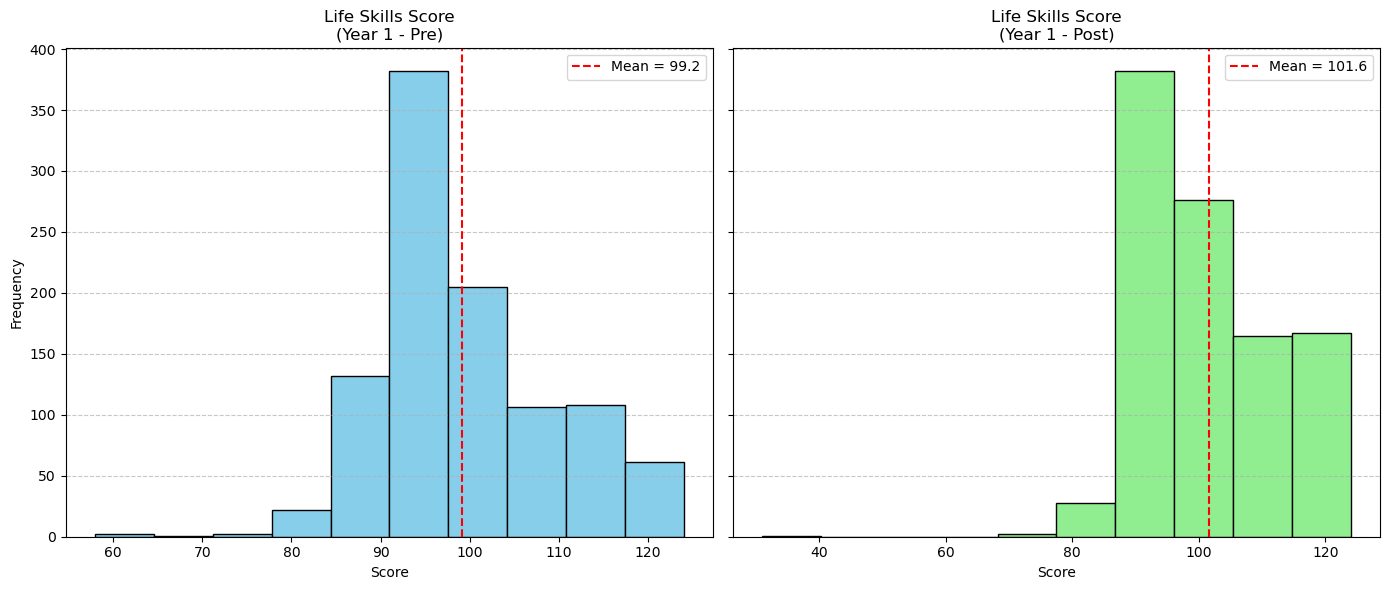

In [70]:
# SIDE BY SID HISTOGRAM

# Calculate means for insights
mean_pre = df_y1_pre["life_skill_score"].mean()
mean_post = df_y1_post["life_skill_score"].mean()

# Create side-by-side histograms for understanding self in pre and post in year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y1_pre["life_skill_score"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].axvline(mean_pre, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_pre:.1f}")
axes[0].set_title("Life Skills Score\n(Year 1 - Pre)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y1_post["life_skill_score"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].axvline(mean_post, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_post:.1f}")
axes[1].set_title("Life Skills Score\n(Year 1 - Post)")
axes[1].set_xlabel("Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

In [71]:
# Create a dictionary of descriptive stats
summary = {
    "Y1_Pre": df_y1_pre["life_skill_score"].describe(),
    "Y1_Post": df_y1_post["life_skill_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y1_Pre,1021.0,99.180215,10.029605,58.0,92.0,96.0,105.0,124.0
Y1_Post,1021.0,101.625857,10.734089,31.0,93.0,99.0,110.0,124.0


In [72]:
# Filter Year 1 - Pre and keep only 'id' and 'life_skill_score'
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")] # 👉 Filters df to include only Year 1 and Pre-training records.
df_y1_pre = df_y1_pre[["id", "life_skill_score"]]                   #👉 Keeps only id &  life_skill_score columns from the filtered data.
df_y1_pre = df_y1_pre.rename(columns={"life_skill_score": "life_skill_pre"}) # 👉 Renames the life_skill_score column 
                                                           

# Filter Year 1 - Post and keep only 'id' and 'life_skill_score'
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")] #👉 Filters df to include only Year 2 and Post-training records.
df_y1_post = df_y1_post[["id", "life_skill_score"]]                   # 👉 Keeps only id & life_skill_score columns from the filtered data.
df_y1_post = df_y1_post.rename(columns={"life_skill_score": "life_skill_post"}) # 👉 Renames the life_skill_score column 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y1_pre, df_y1_post, on="id", how="inner") # 👉 Merges the Pre and Post datasets by matching IDs,
                                                                       # so we have both scores side by side for each respondent.
                                                                       

# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["life_skill_pre", "life_skill_post"]) # 👉 Removes any rows where a participant is
                                                                                 # missing either a pre- or post-score.
                                                                                # Wilcoxon requires complete pairs to work properly.
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["life_skill_pre"],
    paired_data["life_skill_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 163513.5
p-value: 1.6559278818708019e-12


#### 🧠 Insights from Life Skills Score for Year 1 

✅ 1. Increase in Mean Score

* Pre-training Mean: 99.18
* Post-training Mean: 101.63

This suggests a modest overall improvement in life skills following the intervention. The increase in average score is visually supported by the rightward shift in the histogram.

✅ 2. Higher Post-Training Scores

* Median (50th percentile) rose from 96 (Pre) to 99 (Post).
* The 75th percentile increased from 105 to 110, indicating that top-performing participants improved further.
* These upward shifts show that more participants reached higher levels of life skill competency post-training.

✅ 3. Greater Score Variability After Training

* Standard deviation increased from 10.03 (Pre) to 10.73 (Post).
* This suggests a wider spread in scores post-intervention, meaning that while many improved, some may not have benefitted as much—or had varying responses to the program.

✅ 4. Presence of Outliers

* Minimum score dropped from 58 (Pre) to 31 (Post). This could reflect data entry issues, disengagement, or specific subgroups who did not benefit from the training.
    
* Maximum score remained stable at 124 for both groups.

✅ 5. Rightward Shift in Histogram

* The Year 1 Post histogram is visibly shifted to the right compared to the Pre histogram.
* This means more participants scored higher on life skills after the intervention.
* The peak (mode) of the distribution also seems to have shifted slightly toward higher values.

✅ 6. Stretch in the histogram Upper Tail

* The Post group has a broader right tail, suggesting more individuals achieving very high scores.
* The increase in the 75th percentile from 105 to 110 confirms this: top performers did better.

✅ 7. Score statisticaly different

The Wilcoxon Signed-Rank Test yield a p-value that is extremely small (much less than 0.05), which means the difference between pre- and post-training scores is statistically significant. 

🔍 Conclusion:
There is a statistically significant increase in life skill scores from pre- to post-intervention, confirming the visual trends we observed earlier in the histograms and summary stats.This provides strong evidence that the training/intervention led to a real improvement in life skill scores among participants in Year 1.


### Life Skills : Analysis for  Year 2

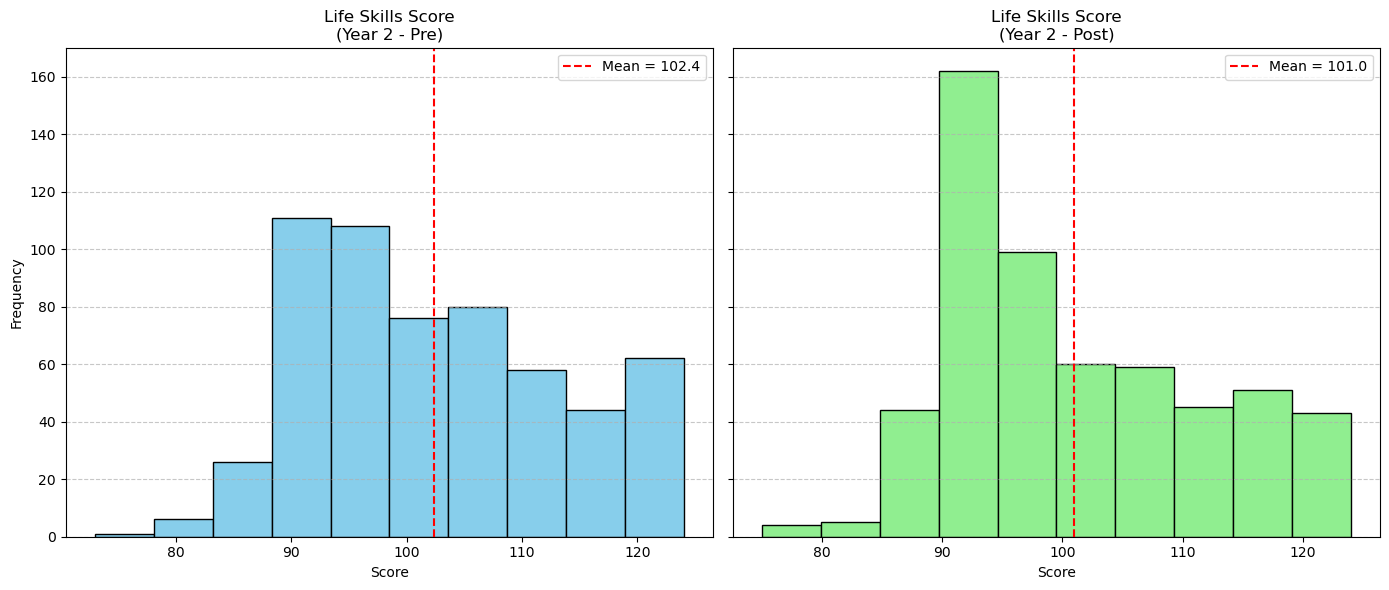

In [75]:
# SIDE BY SID HISTOGRAM

# Calculate means for insights
mean_pre = df_y2_pre["life_skill_score"].mean()
mean_post = df_y2_post["life_skill_score"].mean()

# Create side-by-side histograms for understanding self in pre and post in year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y2_pre["life_skill_score"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].axvline(mean_pre, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_pre:.1f}")
axes[0].set_title("Life Skills Score\n(Year 2 - Pre)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y2_post["life_skill_score"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].axvline(mean_post, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_post:.1f}")
axes[1].set_title("Life Skills Score\n(Year 2 - Post)")
axes[1].set_xlabel("Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

In [76]:
# Create a dictionary of descriptive stats
summary = {
    "Y2_Pre": df_y2_pre["life_skill_score"].describe(),
    "Y2_Post": df_y2_post["life_skill_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y2_Pre,572.0,102.400350,10.905526,73.0,93.0,101.0,111.0,124.0
Y2_Post,572.0,100.954545,10.808703,75.0,93.0,98.0,109.0,124.0


In [77]:
# Filter Year 2 - Pre and keep only 'id' and 'life_skill_score'
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")] # 👉 Filters df to include only Year 2 and Pre-training records.
df_y2_pre = df_y2_pre[["id", "life_skill_score"]]                   #👉 Keeps only id &  life_skill_score columns from the filtered data.
df_y2_pre = df_y2_pre.rename(columns={"life_skill_score": "life_skill_pre"}) # 👉 Renames the life_skill_score column 
                                                           

# Filter Year 2 - Post and keep only 'id' and 'life_skill_score'
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")] #👉 Filters df to include only Year 2 and Post-training records.
df_y2_post = df_y2_post[["id", "life_skill_score"]]                   # 👉 Keeps only id & life_skill_score columns from the filtered data.
df_y2_post = df_y2_post.rename(columns={"life_skill_score": "life_skill_post"}) # 👉 Renames the life_skill_score column 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y2_pre, df_y2_post, on="id", how="inner") # 👉 Merges the Pre and Post datasets by matching IDs,
                                                                       # so we have both scores side by side for each respondent.
                                                                       

# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["life_skill_pre", "life_skill_post"]) # 👉 Removes any rows where a participant is
                                                                                 # missing either a pre- or post-score.
                                                                                # Wilcoxon requires complete pairs to work properly.
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["life_skill_pre"],
    paired_data["life_skill_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 69066.0
p-value: 0.032458430235314556


#### 🧠 Insights from Life Skills Score for Year 2

✅ 1. Slight Decrease in Average Life Skill Score
* Pre-intervention mean: 102.4
* Post-intervention mean: 100.95
* This shows a modest decline in average life skill scores after the training. The red dashed mean line on the Post histogram is slightly to the left of the Pre, confirming this small drop.

✅ 2. Median Shift Indicates Broader Change
*The median dropped from 101 (Pre) to 98 (Post). While not a drastic change, it suggests that more than half of the participants scored lower post-intervention.

✅ 3. Overall Distribution Shifted Left
* Visually, the histogram for Post appears flatter and shifted slightly left, indicating more spread in responses and fewer participants scoring in the higher range.
* The 75th percentile also decreased (from 111 to 109), supporting the observation that top performers did not improve post-training.

✅ 4. Similar Spread, But Slightly Lower Performance
* Standard deviation remained similar: 10.91 (Pre) vs. 10.81 (Post). This tells us the variability stayed stable, but the entire distribution shifted slightly lower.

✅ 5. Minimum and Maximum Scores Stayed Strong
* The score range (Min–Max) stayed nearly identical: Min: 73 → 75  and  Max: 124 (both)
* So, the range is consistent, but central tendencies (mean, median) moved downward.


✅ 6. Leftward Shift in Central Values

* The histogram for Post is slightly shifted to the left compared to Pre.The mean drops from 102.4 to 100.95, and the median shifts from 101 to 98, indicating a general downward movement in the score distribution.This shows that most participants scored slightly lower after the intervention.

✅ 7. Flattening of the Distribution Post-Training

*  The Pre histogram appears more peaked, while the Post histogram is flatter.This suggests that responses became more spread out, and fewer people clustered around higher scores.

✅ 8. Score in year 2 satistically different:

* The Wilcoxon Signed-Rank Test yielded a p-value of  0.032, which is below the conventional threshold of 0.05.This means the decrease in life skill scores from Pre to Post in Year 2 is statistically significant — the observed difference is unlikely due to chance. Although the decline in scores was small, this test confirms that it is statistically meaningful for the panel of participants.

🔍 Conclusion: The intervention in Year 2 appears to have had a statistically significant but slightly negative effect on life skill scores. While the distribution shift was subtle, the Wilcoxon test confirms that the decrease is real and consistent across participants.

### Employability  : Analysis for Year 1

In [80]:
# Re-filter Year 1 Pre and Post so they include the latest columns
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

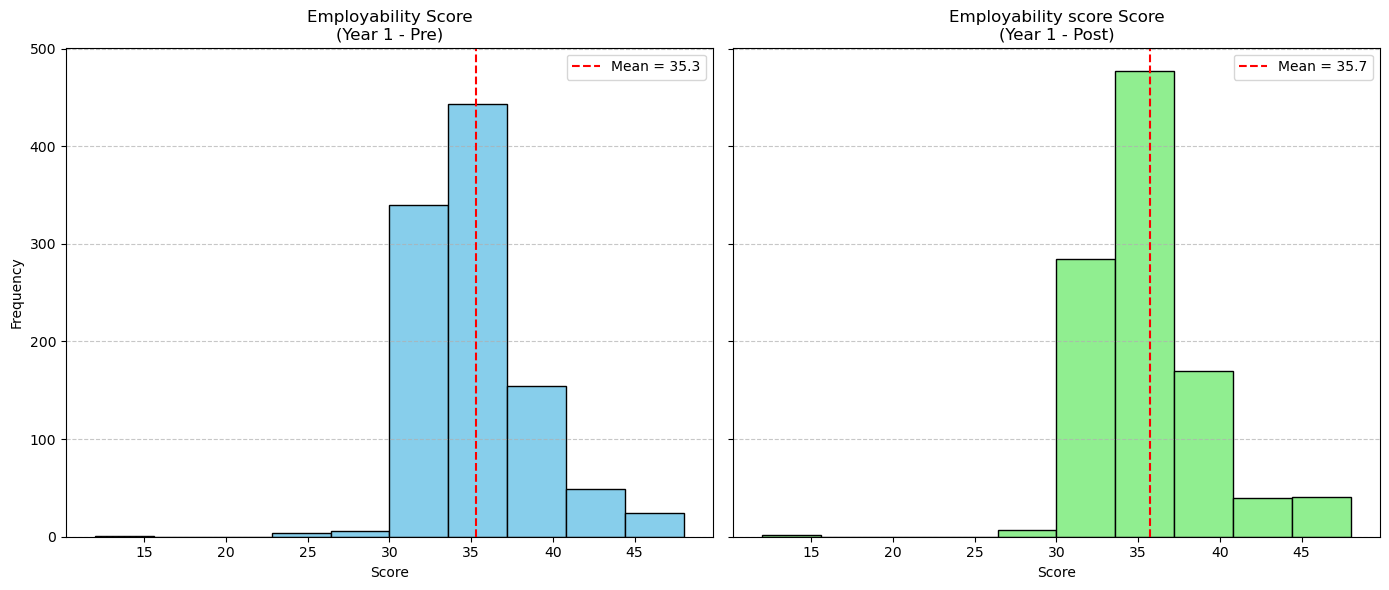

In [81]:
# SIDE BY SID HISTOGRAM

# Calculate means for insights
mean_pre = df_y1_pre["employability_score"].mean()
mean_post = df_y1_post["employability_score"].mean()

# Create side-by-side histograms for employability  in pre and post in year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y1_pre["employability_score"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].axvline(mean_pre, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_pre:.1f}")
axes[0].set_title("Employability Score\n(Year 1 - Pre)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y1_post["employability_score"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].axvline(mean_post, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_post:.1f}")
axes[1].set_title("Employability score Score\n(Year 1 - Post)")
axes[1].set_xlabel("Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

In [82]:
# Create a dictionary of descriptive stats
summary = {
    "Y1_Pre": df_y1_pre["employability_score"].describe(),
    "Y1_Post": df_y1_post["employability_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y1_Pre,1021.0,35.29383,3.588360,12.0,33.0,35.0,37.0,48.0
Y1_Post,1021.0,35.72478,3.810417,12.0,33.0,36.0,37.0,48.0


In [83]:
# Filter Year 1 - Pre and keep only 'id' and 'employability_score'
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")] # 👉 Filters df to include only Year 1 and Pre-training records.
df_y1_pre = df_y1_pre[["id", "employability_score"]]                   #👉 Keeps only id &  employability_score columns from the filtered data.
df_y1_pre = df_y1_pre.rename(columns={"employability_score": "employability_pre"}) # 👉 Renames the life_skill_score column 
                                                           

# Filter Year 1 - Post and keep only 'id' and 'employability_score'
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")] #👉 Filters df to include only Year 2 and Post-training records.
df_y1_post = df_y1_post[["id", "employability_score"]]                   # 👉 Keeps only id & employability_score columns from the filtered data.
df_y1_post = df_y1_post.rename(columns={"employability_score": "employability_post"}) # 👉 Renames the life_skill_score column 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y1_pre, df_y1_post, on="id", how="inner") # 👉 Merges the Pre and Post datasets by matching IDs,
                                                                       # so we have both scores side by side for each respondent.
                                                                       

# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["employability_pre", "employability_post"]) # 👉 Removes any rows where a participant is
                                                                                 # missing either a pre- or post-score.
                                                                                # Wilcoxon requires complete pairs to work properly.
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["employability_pre"],
    paired_data["employability_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 171420.0
p-value: 0.004786646254808239


### 🧠 Insights from Employability Score for Year 1

✅ 1. Slight Increase in Average Employability Score

* Pre-intervention mean: 35.29
* Post-intervention mean: 35.72

This shows a modest improvement in employability scores following the training. The red dashed mean line in the post histogram is slightly to the right of the pre, confirming this small upward shift.

✅ 2. Median Shift Indicates Group-Level Improvement

Median increased from 35 (Pre) to 36 (Post). This suggests that more than half of the participants scored slightly higher post-intervention.

✅ 3. Distribution Shifted Right, Though Slightly

* Visually, the histogram for Post is slightly shifted to the right, indicating an overall improvement in scores.
* The 75th percentile remained at 37, showing that top performers maintained their level, while the bulk of participants moved slightly higher.

✅ 4. Slight Increase in Variability

* Standard deviation increased from 3.59 (Pre) to 3.81 (Post). This indicates that while the average score rose, the spread of scores widened slightly, likely due to individual differences in training response.
  
✅ 5. Minimum and Maximum Scores Remained the Same

* Score range (Min–Max) stayed at 12 to 48 in both pre and post, indicating no extreme new highs or lows introduced by the intervention.

✅ 6. Rightward Shift in Central Tendency

* The mean and median both shifted right, showing a general upward movement in the score distribution. This confirms a positive though modest effect of the program on employability outcomes.

✅ 7. Subtle Flattening of the Post Distribution

* The Pre histogram appears slightly more peaked, while the Post distribution is a bit flatter and broader. This implies greater variability in participant outcomes, possibly reflecting diverse levels of benefit from the intervention.

✅ 8. Employability Score pre-post statisticaly different in year 1

The Wilcoxon Signed-Rank Test yield a p-value that is  small (much less than 0.05), which means the difference between pre- and post-training scores is statistically significant.

🔍 Conclusion: There is a statistically significant increase in employability scores from pre- to post training, confirming the visual trends we observed earlier in the histograms and summary stats.This provides strong evidence that the training/intervention led to a real improvement in employability scores among participants in Year 1.

### Employability:  Analysis for year 2

In [86]:
# Re-filter Year 2 Pre and Post so they include the latest columns
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")]
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")]

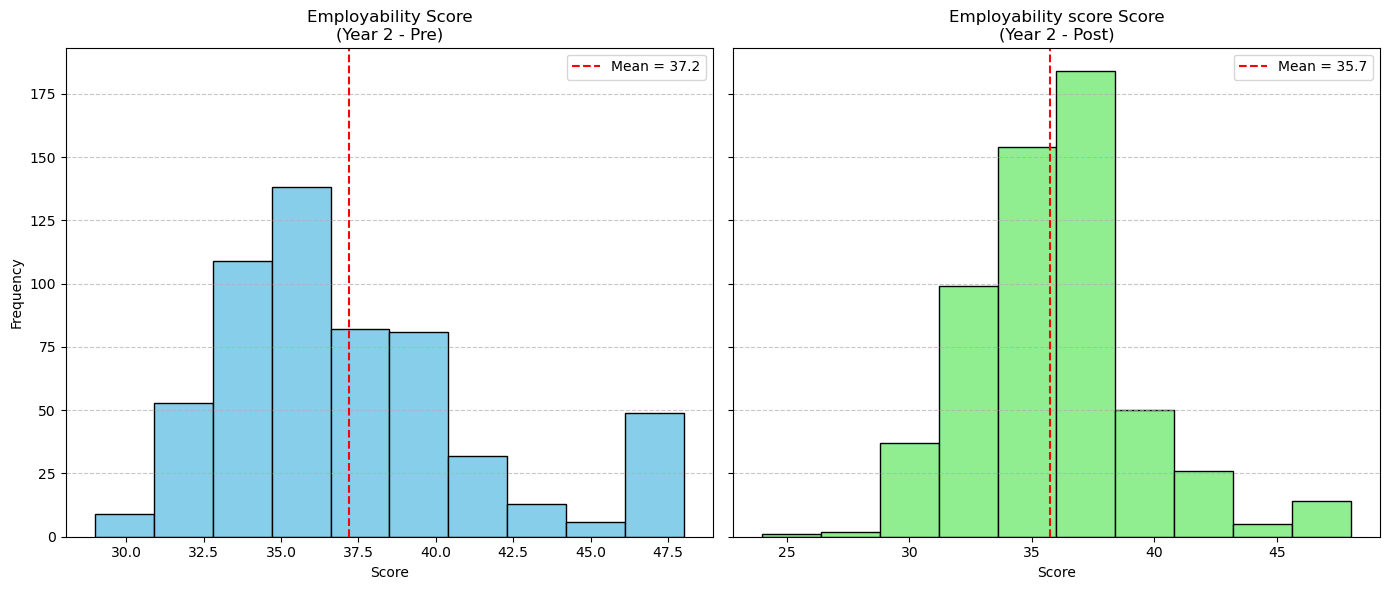

In [87]:
# SIDE BY SID HISTOGRAM

# Calculate means for insights
mean_pre = df_y2_pre["employability_score"].mean()
mean_post = df_y2_post["employability_score"].mean()

# Create side-by-side histograms for employability  in pre and post in year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y2_pre["employability_score"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].axvline(mean_pre, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_pre:.1f}")
axes[0].set_title("Employability Score\n(Year 2 - Pre)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y2_post["employability_score"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].axvline(mean_post, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_post:.1f}")
axes[1].set_title("Employability score Score\n(Year 2 - Post)")
axes[1].set_xlabel("Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

In [88]:
# Create a dictionary of descriptive stats
summary = {
    "Y2_Pre": df_y2_pre["employability_score"].describe(),
    "Y2_Post": df_y2_post["employability_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y2_Pre,572.0,37.202797,4.543712,29.0,34.0,36.0,39.0,48.0
Y2_Post,572.0,35.743007,3.479040,24.0,34.0,35.0,37.0,48.0


In [89]:
# Filter Year 2 - Pre and keep only 'id' and 'employability_score'
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")] # 👉 Filters df to include only Year2 and Pre-training records.
df_y2_pre = df_y2_pre[["id", "employability_score"]]                   #👉 Keeps only id &  employability_score columns from the filtered data.
df_y2_pre = df_y2_pre.rename(columns={"employability_score": "employability_pre"}) # 👉 Renames the life_skill_score column 
                                                           

# Filter Year 2 - Post and keep only 'id' and 'employability_score'
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")] #👉 Filters df to include only Year 2 and Post-training records.
df_y2_post = df_y2_post[["id", "employability_score"]]                   # 👉 Keeps only id & employability_score columns from the filtered data.
df_y2_post = df_y2_post.rename(columns={"employability_score": "employability_post"}) # 👉 Renames the life_skill_score column 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y2_pre, df_y2_post, on="id", how="inner") # 👉 Merges the Pre and Post datasets by matching IDs,
                                                                       # so we have both scores side by side for each respondent.



# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["employability_pre", "employability_post"]) # 👉 Removes any rows where a participant is
                                                                                 # missing either a pre- or post-score.
                                                                                # Wilcoxon requires complete pairs to work properly.
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["employability_pre"],
    paired_data["employability_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 43343.5
p-value: 1.0972036604130017e-10


#### 🧠 Insights from Employability Score – Year 2 

✅ 1. Decrease in Average Employability Score

* Pre-intervention mean: 37.20
* Post-intervention mean: 35.74

This shows a notable drop in average employability scores after the training. The red dashed line for the mean in the Post histogram is shifted left, confirming the decrease in average performance.

✅ 2. Median Shift Suggests Broad Decline

* Median dropped from 36 (Pre) to 35 (Post). This indicates that more than half of participants scored lower after the intervention, pointing to a broad pattern of decreased performance.
  
✅ 3. Leftward Shift in the Distribution

* The Post histogram is clearly shifted to the left compared to the Pre histogram.
* Fewer participants reached the higher score brackets post-intervention.
* The 75th percentile dropped from 39 to 37, confirming that even higher performers declined.
  
✅ 4. Slight Decrease in Variability

* Standard deviation decreased from 4.54 (Pre) to 3.48 (Post). This suggests that while most scores dropped, the spread became more concentrated, with fewer outliers or extreme high performers.
  
✅ 5. Score Range Narrowed Slightly

Minimum score decreased from 29 to 24, while maximum remained 48. This reinforces the drop in the lower end of the performance spectrum.

✅ 6. Histogram Shape: Flattening with a Downward Shift

The Post histogram is flatter and shifted left, meaning scores were not only lower but also more uniformly distributed around a lower average.
The Pre histogram had a clearer central peak, suggesting more participants were scoring in the upper-middle range.


✅ 7. Statistically Significant Decline (Wilcoxon Test)

Wilcoxon Test Statistic: 43,343.5
p-value: 1.10 × 10⁻¹⁰ 

This very low p-value confirms that the decline is statistically significant — it is highly unlikely to be due to chance.


🔍Conclusion
The Year 2 data shows a statistically significant and meaningful decline in employability scores following the intervention. Unlike Year 1, where we observed modest gains, Year 2 outcomes suggest that the program may not have been as effective — or that contextual factors influenced performance negatively. Further exploration by subgroup or implementation differences may help explain this trend. ​

### Did youth who improved more in life skills also improve more in employability?

In [92]:
# LOOKING AT CORRELATION FOR YEAR 1


# Filter Year 1 Pre and Post data
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

# Select and rename relevant columns
df_y1_pre = df_y1_pre[["id", "life_skill_score", "employability_score"]].rename(
    columns={
        "life_skill_score": "life_skill_pre",
        "employability_score": "employability_pre"
    }
)

df_y1_post = df_y1_post[["id", "life_skill_score", "employability_score"]].rename(
    columns={
        "life_skill_score": "life_skill_post",
        "employability_score": "employability_post"
    }
)

# Merge Pre and Post datasets on 'id'
df_y1_merged = pd.merge(df_y1_pre, df_y1_post, on="id", how="inner")

# Drop rows with missing values
df_y1_merged = df_y1_merged.dropna(subset=[
    "life_skill_pre", "life_skill_post",
    "employability_pre", "employability_post"
])

# Compute change scores
df_y1_merged["life_skill_change"] = df_y1_merged["life_skill_post"] - df_y1_merged["life_skill_pre"]
df_y1_merged["employability_change"] = df_y1_merged["employability_post"] - df_y1_merged["employability_pre"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


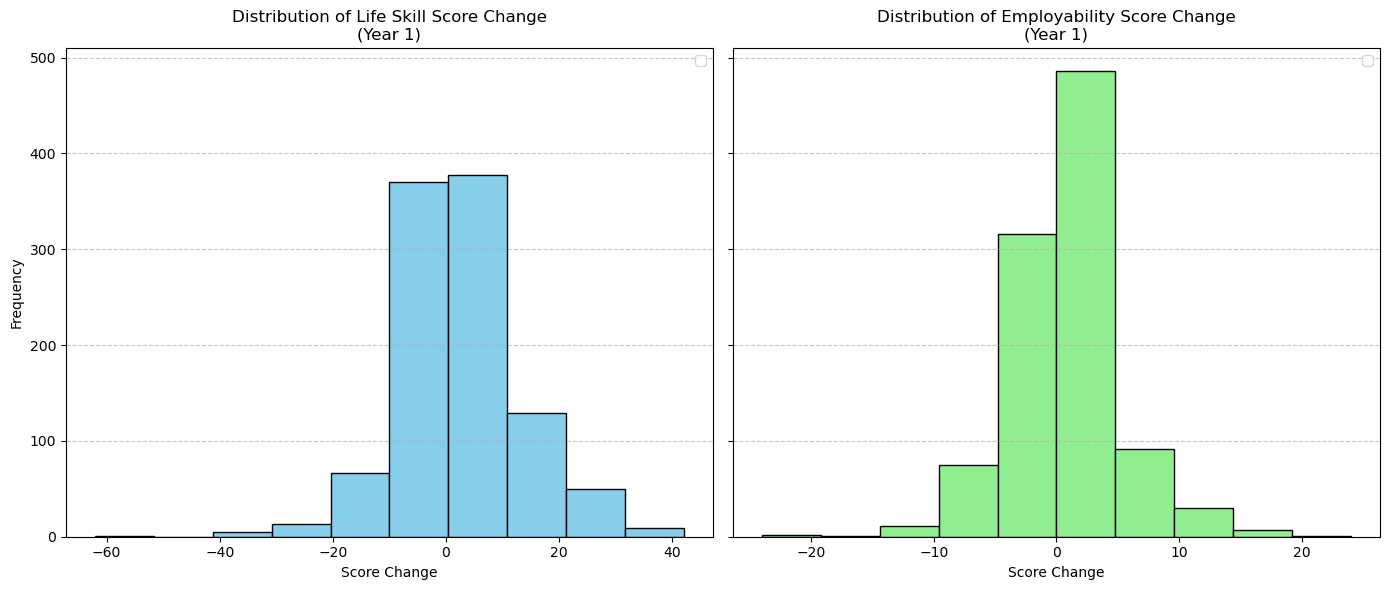

In [93]:
# Create side-by-side histograms for  Life skill and employability change in score for year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y1_merged["life_skill_change"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].set_title("Distribution of Life Skill Score Change\n(Year 1)")
axes[0].set_xlabel("Score Change")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y1_merged["employability_change"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].set_title("Distribution of Employability Score Change\n(Year 1)")
axes[1].set_xlabel("Score Change")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

__Question: What percentage of youth have improved in year 1 ?__ 

In [95]:
# Count of improved  life skills scores (score_change > 0)
num_improved_lifeskills = (df_y1_merged['life_skill_change'] > 0).sum()
# Total number of observations of life skills score
total_lifeskills = df_y1_merged['life_skill_change'].count()
# Proportion who improved life skills score 
proportion_improved_lifeskills  = num_improved_lifeskills / total_lifeskills

# Count of improved  life employability scores (score_change > 0)
num_improved_employability = (df_y1_merged['employability_change'] > 0).sum()
# Total number of observations of employability score
total_employability = df_y1_merged['employability_change'].count()
# Proportion who improved life skills score 
proportion_improved_employability  = num_improved_employability / total_employability


print(f"Proportion of youth who improved life skills  socre in year 1: {proportion_improved_lifeskills:.2%}")
print(f"Proportion of youth who improved employability socre in year 1: {proportion_improved_employability:.2%}")

Proportion of youth who improved life skills  socre in year 1: 55.44%
Proportion of youth who improved employability socre in year 1: 46.23%


In [96]:
# Calculate Spearman correlation between change scores
correlation_matrix = df_y1_merged[["life_skill_change", "employability_change"]].corr(method="spearman")

# Output the result
correlation_matrix

,life_skill_change,employability_change
life_skill_change,1.000000,0.500641
employability_change,0.500641,1.000000


### Interprating Scores pre and post using confidence interval (CI) approach

In the next cell code we will apply the method I for  reporting and interpretaing the pre and post life skill and employability score per the  LSA manual.  This approach is recommended when comparing individual student scores over time, without comparing them to other students. It involves estimating the confidence interval (CI) around each observed score using the Standard Error of Measurement (SEm), providing a range in which the individual's “true score” likely lies. 

Step-by-Step Guide
1. Calculate the Raw Scores
Use the scoring key for each module or domain to calculate the individual’s total raw score.

2. Calculate the Standard Deviation (SD)
Compute the SD of test scores from the group of test takers.

3. Use Module Reliability Values

    * Core Module:	0.918
  
    * Understanding Self:	0.580
  
    * Relationship Skills:	0.783
  
    * Higher Order Thinking Skills: 	0.724
  
    * Employability: 	0.980
  
    * Growth Mindset: 	0.87

4. Calculate the Standard Error of Measurement (SEm)

    SEm = SD x root sqaure(1- reliability)

​5. Choose a Confidence Level and Identify the Z-value (1.96)

6. Build the Confidence Interval (CI)

    CI=Observed Score ± (SEm × Z)

    This gives the lower and upper bounds for the range in which the “true score” likely falls.

7. Construct CIs for Both Baseline and Endline
   Repeat the above process for both the Baseline (BL) and Endline (EL) scores to assess improvement.

8. Interpret the Results Using CI Overlap
   
   Case 1: If the lower bound of the Endline CI is above the upper bound of the Baseline CI, the individual has meaningfully improved.

   Case 2: If the lower bound of the Endline CI is within the range of the Baseline CI, there may be no meaningful improvement


In [98]:
# LIFE SKILLS SCORE CHANGE IN YEAR 1 USING CONFIDENCE INTERVAL METHOD 

import numpy as np

# Filter the dataset into baseline (pre) and endline (post) subsets for year1
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

# Reliability for Core Module
reliability = 0.918

# Calculate standard deviation for both baseline and endline
sd_pre = df_y1_pre["life_skill_score"].std()
sd_post = df_y1_post["life_skill_score"].std()

# Calculate Standard Error of Measurement (SEm) for both
sem_pre = sd_pre * np.sqrt(1 - reliability)
sem_post = sd_post * np.sqrt(1 - reliability)

# Z-value for 95% confidence interval
z = 1.96

# Build confidence intervals
df_y1_pre = df_y1_pre.copy()
df_y1_post = df_y1_post.copy()

df_y1_pre["CI_lower"] = df_y1_pre["life_skill_score"] - (sem_pre * z)
df_y1_pre["CI_upper"] = df_y1_pre["life_skill_score"] + (sem_pre * z)

df_y1_post["CI_lower"] = df_y1_post["life_skill_score"] - (sem_post * z)
df_y1_post["CI_upper"] = df_y1_post["life_skill_score"] + (sem_post * z)

# Merge pre and post on student ID to compare CI ranges
comparison_df = pd.merge(
    df_y1_pre[["id", "life_skill_score", "CI_lower", "CI_upper"]],
    df_y1_post[["id", "life_skill_score", "CI_lower", "CI_upper"]],
    on="id",
    suffixes=("_pre", "_post")
)

# Interpret cases
def interpret(row):
    if row["CI_lower_post"] > row["CI_upper_pre"]:
        return "Case 1: Meaningful Improvement"
    else:
        return "Case 2: No Clear Improvement"

comparison_df["interpretation"] = comparison_df.apply(interpret, axis=1)

# Calculate number and percentage of students with meaningful improvement
num_improved = (comparison_df["interpretation"] == "Case 1: Meaningful Improvement").sum()
total_students = comparison_df.shape[0]
percent_improved = (num_improved / total_students) * 100

print(f"Number of students with meaningful improvement: {num_improved}")
print(f"Percentage of students with meaningful improvement: {percent_improved:.2f}%")


Number of students with meaningful improvement: 165
Percentage of students with meaningful improvement: 16.16%


In [228]:
# EMPLOYABILITY  SCORE CHANGE IN YEAR 1 USING CONFIDENCE INTERVAL METHOD 

# Filter for year1 pre and post
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

# Reliability for the Core Module (assumed value)
reliability = 0.918

# Calculate standard deviation for employability_score
sd_pre = df_y1_pre["employability_score"].std()
sd_post = df_y1_post["employability_score"].std()

# Standard Error of Measurement
sem_pre = sd_pre * np.sqrt(1 - reliability)
sem_post = sd_post * np.sqrt(1 - reliability)

# Z-value for 95% confidence interval
z = 1.96

# Build confidence intervals
df_y1_pre = df_y1_pre.copy()
df_y1_post = df_y1_post.copy()

df_y1_pre["CI_lower"] = df_y1_pre["employability_score"] - (sem_pre * z)
df_y1_pre["CI_upper"] = df_y1_pre["employability_score"] + (sem_pre * z)

df_y1_post["CI_lower"] = df_y1_post["employability_score"] - (sem_post * z)
df_y1_post["CI_upper"] = df_y1_post["employability_score"] + (sem_post * z)

# Merge the pre and post data on student ID
comparison_employability = pd.merge(
    df_y1_pre[["id", "employability_score", "CI_lower", "CI_upper"]],
    df_y1_post[["id", "employability_score", "CI_lower", "CI_upper"]],
    on="id",
    suffixes=("_pre", "_post")
)

# Define interpretation logic
def interpret(row):
    if row["CI_lower_post"] > row["CI_upper_pre"]:
        return "Case 1: Meaningful Improvement"
    else:
        return "Case 2: No Clear Improvement"

# Apply the logic to each row
comparison_employability["interpretation"] = comparison_employability.apply(interpret, axis=1)

# Calculate the number and percentage of students with meaningful improvement
num_improved = (comparison_employability["interpretation"] == "Case 1: Meaningful Improvement").sum()
total_students = comparison_employability.shape[0]
percent_improved = (num_improved / total_students) * 100

# Output the results
print(f"Number of students with meaningful improvement: {num_improved}")
print(f"Percentage of students with meaningful improvement: {percent_improved:.2f}%")


Number of students with meaningful improvement: 130
Percentage of students with meaningful improvement: 12.73%


### Improvement year 1:  post–pre score difference versus Confidence interval  

In analyzing the post–pre score difference of life skills in year one, we found that 55% of youth showed improvement. However, when we applied confidence interval (CI) method, this percentage dropped to 16%.  Approximately 12.73% of students showed meaningful improvement in their employability score from pre to post using the confidence interval method while it was estimated to 46% with pre-post score difference method.

The raw score difference method is simple and intuitive, but it does not account for measurement error, score reliability, or natural variation. Even a 1-point increase is labeled as improvement, regardless of whether that change is statistically meaningful. Under this method, any positive change from baseline to endline is considered an improvement. It is highly sensitive, capturing even very small changes — including those that may fall within the margin of error.

In contrast, the confidence interval method builds a range around each score, using the standard error of measurement (SEm) and the reliability coefficient. A student is only considered to have improved if the entire post-intervention confidence interval lies above the upper bound of the baseline confidence interval. Only statistically significant gains — where the post CI is clearly above the pre CI — are counted as improvements. This method is less sensitive, but more conservative, filtering out "noise" and recognizing only substantial improvements that go beyond expected score fluctuations.

In the context of the Indonesia LSA analysis, the pre–post method is useful for quick internal reviews, identifying general trends, and supporting early-stage program insights. It is most appropriate when the goal is to monitor overall movement rather than detect statistically significant change. On the other hand, the CI approach is ideal for rigorous final evaluations, donor reporting, and high-stakes decisions, where it is crucial to distinguish real change from minor or incidental score variations.


🧠 __Insights from the correlation in year 1__

* Spearman correlation coefficient between Change in Life Skills and Employability in year a is : 0.50

* Interpretation: This is a moderate positive correlation between the change in Life Skills Score and the change in Employability Score. In practical terms, this means that participants who improved more in life skills also tended to improve more in employability. The relationship is strong enough to suggest a meaningful link between growth in these two areas.


In [100]:
# LOOKING AT CORRELATION FOR YEAR 2

# Filter Year 2 Pre and Post data
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")]
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")]

# Select and rename relevant columns
df_y2_pre = df_y2_pre[["id", "life_skill_score", "employability_score"]].rename(
    columns={
        "life_skill_score": "life_skill_pre",
        "employability_score": "employability_pre"
    }
)

df_y2_post = df_y2_post[["id", "life_skill_score", "employability_score"]].rename(
    columns={
        "life_skill_score": "life_skill_post",
        "employability_score": "employability_post"
    }
)

# Merge Pre and Post datasets on 'id'
df_y2_merged = pd.merge(df_y2_pre, df_y2_post, on="id", how="inner")

# Drop rows with missing values
df_y2_merged = df_y2_merged.dropna(subset=[
    "life_skill_pre", "life_skill_post",
    "employability_pre", "employability_post"
])

# Compute change scores
df_y2_merged["life_skill_change"] = df_y2_merged["life_skill_post"] - df_y2_merged["life_skill_pre"]
df_y2_merged["employability_change"] = df_y2_merged["employability_post"] - df_y2_merged["employability_pre"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


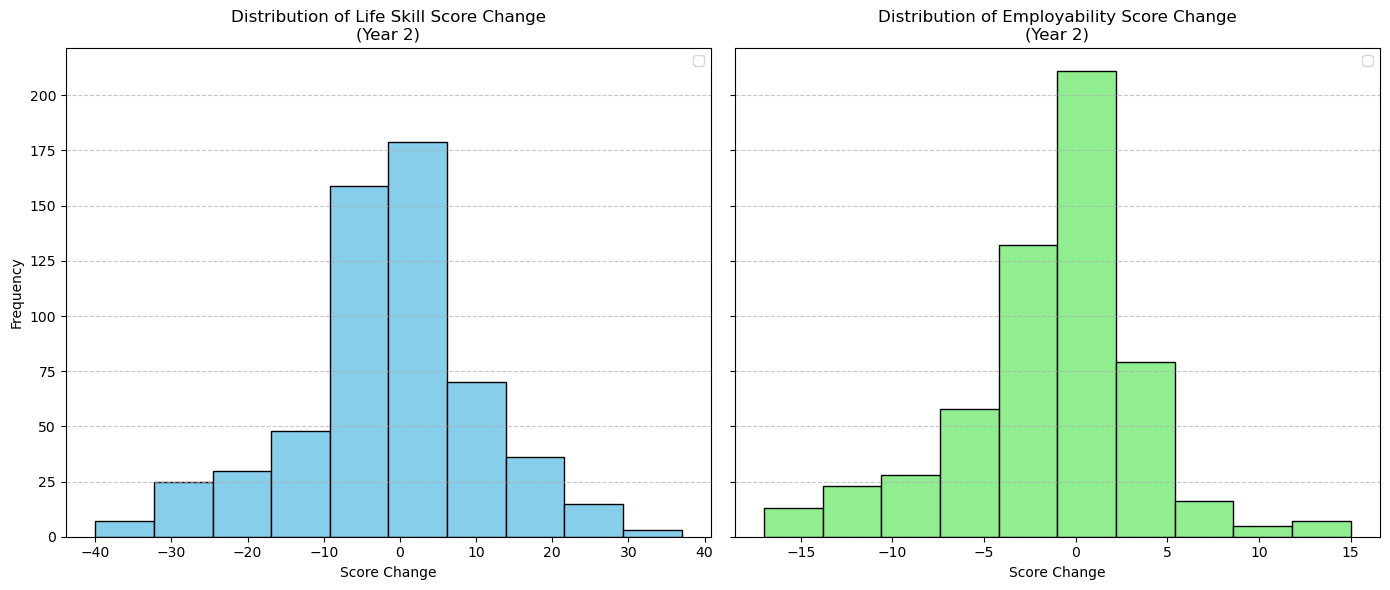

In [101]:
# Create side-by-side histograms for  Life skill and employability change in score for year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y2_merged["life_skill_change"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].set_title("Distribution of Life Skill Score Change\n(Year 2)")
axes[0].set_xlabel("Score Change")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y2_merged["employability_change"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].set_title("Distribution of Employability Score Change\n(Year 2)")
axes[1].set_xlabel("Score Change")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

__Question: What percentage of youth have improved (life skills, employability) in year 2 ?__ 

In [103]:
# Count of improved  life skills scores (score_change > 0)
num_improved_lifeskills = (df_y2_merged['life_skill_change'] > 0).sum()
# Total number of observations of life skills score
total_lifeskills = df_y2_merged['life_skill_change'].count()
# Proportion who improved life skills score 
proportion_improved_lifeskills  = num_improved_lifeskills / total_lifeskills

# Count of improved  life employability scores (score_change > 0)
num_improved_employability = (df_y2_merged['employability_change'] > 0).sum()
# Total number of observations of employability score
total_employability = df_y2_merged['employability_change'].count()
# Proportion who improved life skills score 
proportion_improved_employability  = num_improved_employability / total_employability

print(f"Proportion of youth who improved life skills  socre in year 2 : {proportion_improved_lifeskills:.2%}")
print(f"Proportion of youth who improved employability socre in year 2 : {proportion_improved_employability:.2%}")

Proportion of youth who improved life skills  socre in year 2 : 45.28%
Proportion of youth who improved employability socre in year 2 : 33.22%


In [104]:
# Calculate Spearman correlation between change scores
correlation_matrix_y2 = df_y2_merged[["life_skill_change", "employability_change"]].corr(method="spearman")

# Output the result
correlation_matrix_y2

,life_skill_change,employability_change
life_skill_change,1.00000,0.55493
employability_change,0.55493,1.00000


🧠 __Insights from the correlation in year 2__

* Spearman correlation coefficient between Change in Life Skills and Employability: 0.55

* Interpretation: This is a moderately strong positive correlation, slightly higher than in Year 1. It suggests that participants who gained more in life skills were also more likely to see improvements in their employability. This consistent pattern across both years indicates a potentially strong interdependency between the two score areas — reinforcing the value of life skills development in influencing employability outcomes.

C:\Users\Nael\Anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nael\AppData\Local\Temp\ipykernel_30280\2507141547.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


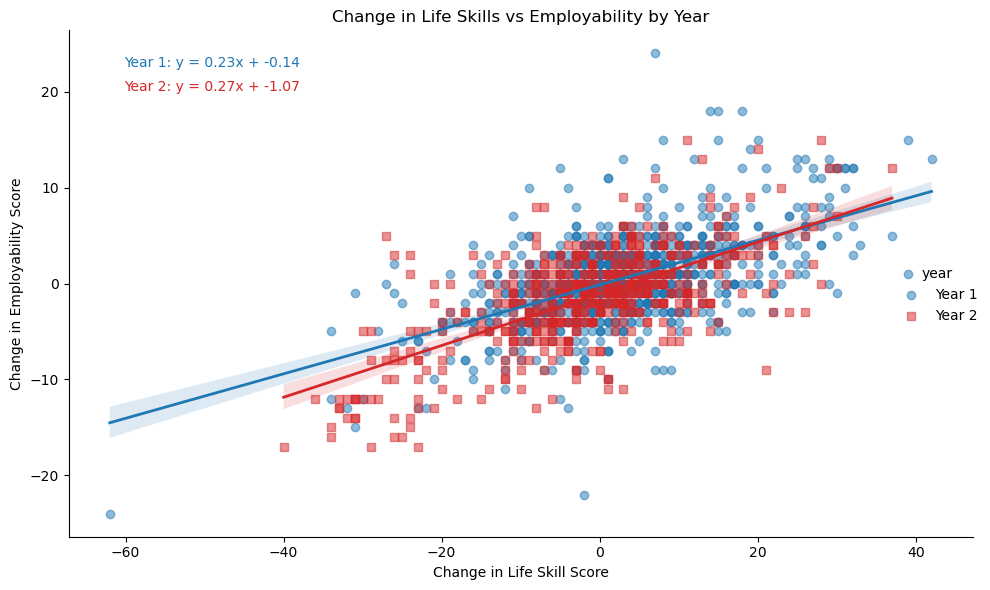

In [106]:
# Combined visual showing the relationship between change in Life Skills and Employability Scores for Year 1 and Year 2:

from scipy.stats import linregress

# Recreate the combined_changes DataFrame since the environment reset might have cleared it
df_y1_merged["year"] = "Year 1"
df_y2_merged["year"] = "Year 2"

# Combine both datasets
combined_changes = pd.concat([df_y1_merged, df_y2_merged], ignore_index=True)

# Year 1 regression
x1 = df_y1_merged["life_skill_change"]
y1 = df_y1_merged["employability_change"]
slope_y1, intercept_y1, _, _, _ = linregress(x1, y1)

# Year 2 regression
x2 = df_y2_merged["life_skill_change"]
y2 = df_y2_merged["employability_change"]
slope_y2, intercept_y2, _, _, _ = linregress(x2, y2)

# Redraw the plot with correct slope/intercept values and colors
palette = {"Year 1": "#1f77b4", "Year 2": "#d62728"}  # blue and red

g = sns.lmplot(
    data=combined_changes,
    x="life_skill_change",
    y="employability_change",
    hue="year",
    palette=palette,
    markers=["o", "s"],
    aspect=1.5,
    height=6,
    scatter_kws={'alpha': 0.5},
    line_kws={'linewidth': 2}
)

plt.xlabel("Change in Life Skill Score")
plt.ylabel("Change in Employability Score")
plt.title("Change in Life Skills vs Employability by Year")

# Annotate regression equations
plt.figtext(0.13, 0.88, f"Year 1: y = {slope_y1:.2f}x + {intercept_y1:.2f}", ha='left', fontsize=10, color=palette["Year 1"])
plt.figtext(0.13, 0.84, f"Year 2: y = {slope_y2:.2f}x + {intercept_y2:.2f}", ha='left', fontsize=10, color=palette["Year 2"])

plt.tight_layout()
plt.show()

🧠 __Insights from the combined visual showing the relationship between change in Life Skills and Employability Scores for Year 1 and Year 2__


✅ 1. Positive Relationship in Both Years : Both Year 1 and Year 2 show an upward trend, meaning participants who improved more in life skills also tended to improve in employability.

✅ 2. Slightly Stronger Trend in Year 2 : The regression line for Year 2 appears slightly steeper, visually supporting the stronger correlation observed earlier (r = 0.55 vs r = 0.50 in Year 1).

✅ 3. Broader Spread in Year 2 : Year 2 also shows a wider spread in change scores — especially for life skills — indicating more variability in participant outcomes.

### Growth mindset  : Analysis for Year 1

In [109]:
# Re-filter Year 1 Pre and Post so they include the latest columns
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

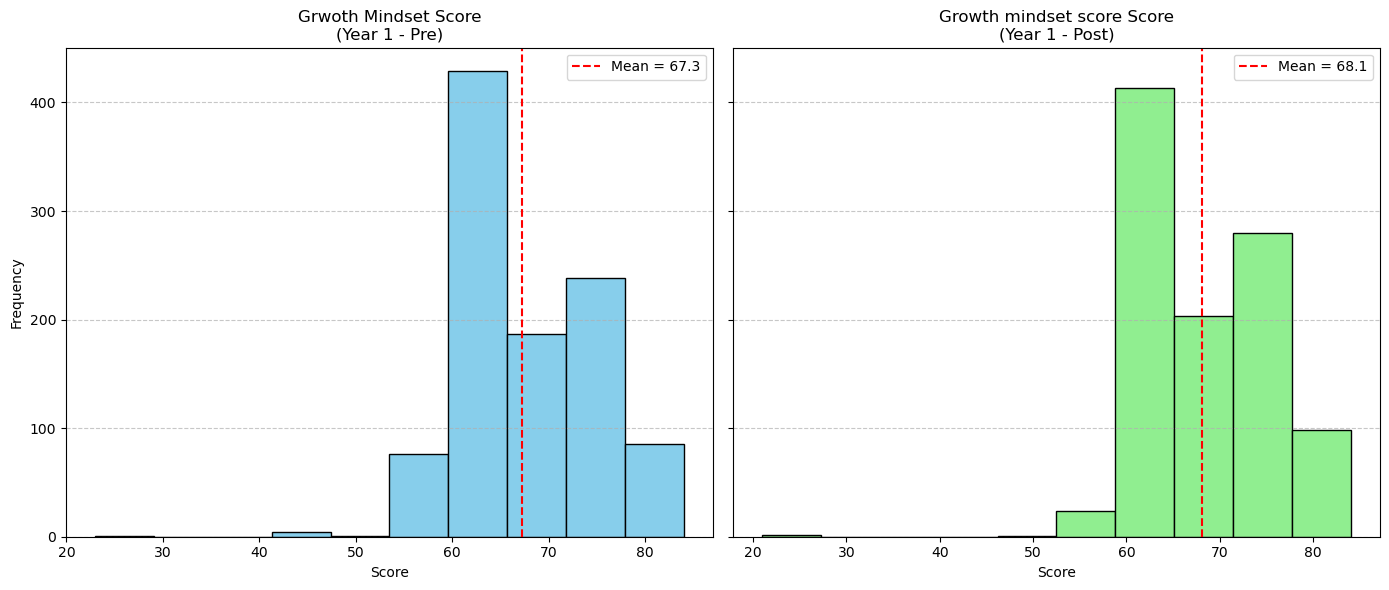

In [110]:
# SIDE BY SID HISTOGRAM

# Calculate means for insights
mean_pre = df_y1_pre["mindset_score"].mean()
mean_post = df_y1_post["mindset_score"].mean()

# Create side-by-side histograms for employability  in pre and post in year 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Pre
axes[0].hist(df_y1_pre["mindset_score"].dropna(), bins=10, edgecolor='black', color='skyblue')
axes[0].axvline(mean_pre, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_pre:.1f}")
axes[0].set_title("Grwoth Mindset Score\n(Year 1 - Pre)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot Post
axes[1].hist(df_y1_post["mindset_score"].dropna(), bins=10, edgecolor='black', color='lightgreen')
axes[1].axvline(mean_post, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean_post:.1f}")
axes[1].set_title("Growth mindset score Score\n(Year 1 - Post)")
axes[1].set_xlabel("Score")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

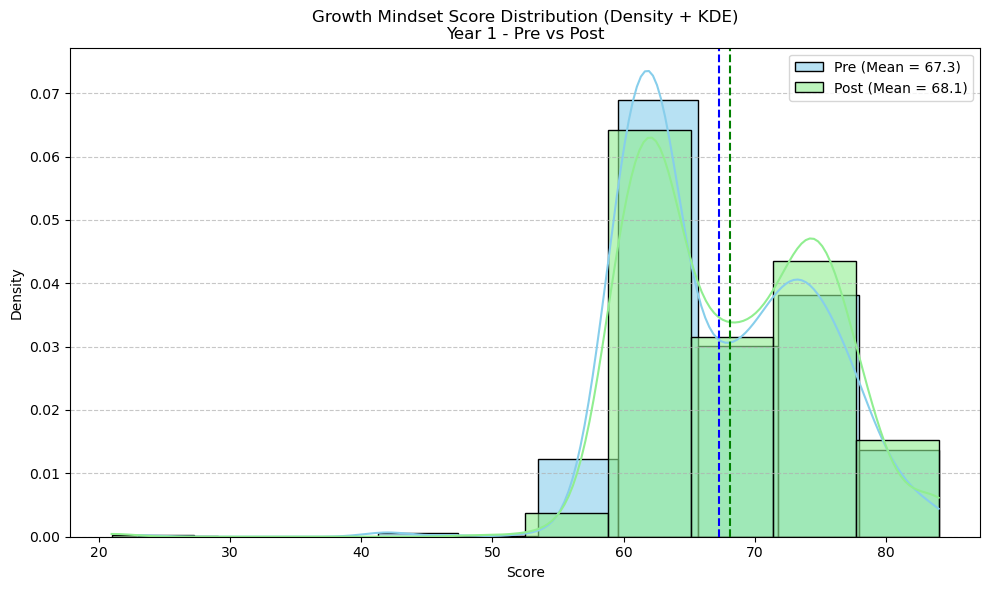

In [111]:
import seaborn as sns

# Calculate means
mean_pre = df_y1_pre["mindset_score"].mean()
mean_post = df_y1_post["mindset_score"].mean()

# Create figure
plt.figure(figsize=(10, 6))

# Plot histograms with density
sns.histplot(df_y1_pre["mindset_score"].dropna(), bins=10, color='skyblue', label=f'Pre (Mean = {mean_pre:.1f})',
             kde=True, stat="density", alpha=0.6, edgecolor='black')

sns.histplot(df_y1_post["mindset_score"].dropna(), bins=10, color='lightgreen', label=f'Post (Mean = {mean_post:.1f})',
             kde=True, stat="density", alpha=0.6, edgecolor='black')

# Add vertical lines for means
plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_post, color='green', linestyle='dashed', linewidth=1.5)

# Labels and formatting
plt.title("Growth Mindset Score Distribution (Density + KDE)\nYear 1 - Pre vs Post")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [112]:
# Create a dictionary of descriptive stats
summary = {
    "Y1_Pre": df_y1_pre["mindset_score"].describe(),
    "Y1_Post": df_y1_post["mindset_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y1_Pre,1021.0,67.256611,7.030798,23.0,62.0,65.0,73.0,84.0
Y1_Post,1021.0,68.132223,7.143566,21.0,62.0,68.0,74.0,84.0


In [113]:
# Filter Year 1 - Pre and keep only 'id' and 'mindset_score'
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")] 
df_y1_pre = df_y1_pre[["id", "mindset_score"]]                  
df_y1_pre = df_y1_pre.rename(columns={"mindset_score": "mindset_pre"}) 
                                                           

# Filter Year 1 - Post and keep only 'id' and 'mindset_score'
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")] 
df_y1_post = df_y1_post[["id", "mindset_score"]]                   
df_y1_post = df_y1_post.rename(columns={"mindset_score": "mindset_post"}) 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y1_pre, df_y1_post, on="id", how="inner") 
                                                                       
                                                                       

# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["mindset_pre", "mindset_post"])
                                                                                 
                                                                                
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["mindset_pre"],
    paired_data["mindset_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 185184.5
p-value: 0.000777100663409898


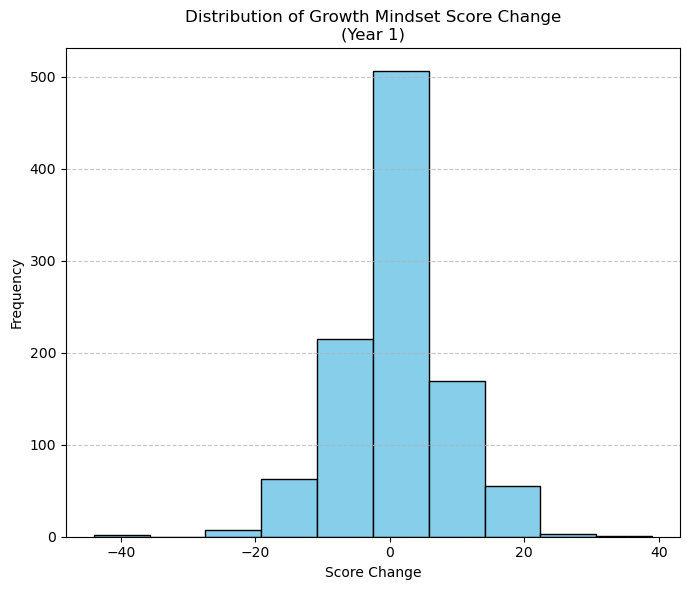

In [114]:
# GROWTH MINDSET SCORE CHANGE IN YEAR 1

# Filter Year 1 Pre and Post data
df_y1_pre = df[(df["year"] == "year1") & (df["time_lsa"] == "pre")]
df_y1_post = df[(df["year"] == "year1") & (df["time_lsa"] == "post")]

# Select and rename relevant columns
df_y1_pre = df_y1_pre[["id", "mindset_score"]].rename(
    columns={
        "mindset_score": "mindset_pre"
    }
)

df_y1_post = df_y1_post[["id", "mindset_score"]].rename(
    columns={
        "mindset_score": "mindset_post"
    }
)

# Merge Pre and Post datasets on 'id'
df_y1_merged = pd.merge(df_y1_pre, df_y1_post, on="id", how="inner")

# Drop rows with missing values
df_y1_merged = df_y1_merged.dropna(subset=["mindset_pre", "mindset_post"])

# Compute change scores
df_y1_merged["mindset_change"] = df_y1_merged["mindset_post"] - df_y1_merged["mindset_pre"]


# Create an histograms for Growth mindset change in score for year 1


fig, ax = plt.subplots(figsize=(7, 6))

ax.hist(df_y1_merged["mindset_change"].dropna(), bins=10, edgecolor='black', color='skyblue')
ax.set_title("Distribution of Growth Mindset Score Change\n(Year 1)")
ax.set_xlabel("Score Change")
ax.set_ylabel("Frequency")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


__Question: What percentage of youth have improved growth mindset in year 1 ?__ 

In [116]:
# Count of improved growth mindset  scores (score_change > 0)
num_improved_mindset = (df_y1_merged['mindset_change'] > 0).sum()
# Total number of observations of growth mindset score
total_mindset = df_y1_merged['mindset_change'].count()
# Proportion who improved mindset score 
proportion_improved_mindset  = num_improved_mindset / total_mindset

print(f"Proportion of youth who improved growth mindset  socre in year 1 : {proportion_improved_mindset:.2%}")

Proportion of youth who improved growth mindset  socre in year 1 : 49.17%


### 🧠 Insights from Growth mindset Score for Year 1

✅ Slightly Increase in Average Growth mindset Score

Pre-intervention mean: 67.25
Post-intervention mean: 68.13

✅ The distribution of growth mindset scores shifted to the right from pre to post, indicating an overall improvement in participant mindset. The post-intervention group had a higher mean score, suggesting a positive effect of the program.

✅ While there is some overlap, the KDE curve for post is more concentrated toward higher scores, showing not just improvement but possibly also greater consistency in participants' mindset.

✅ Grwoth mindset  Score pre-post statisticaly different in year 1

The Wilcoxon Signed-Rank Test yield a p-value that is small (much less than 0.05), which means the difference between pre- and post-training scores is statistically significant.

🔍 Conclusion: There is a statistically significant increaseGrowth mindset lity scores from pre- to post training, confirming the visual trends we observed earlier in the histograms and summary stats.This provides strong evidence that the training/intervention led to a real improvementGrowth mindset lity scores among participants in Year 1.

### Growth mindset  : Analysis for Year 2

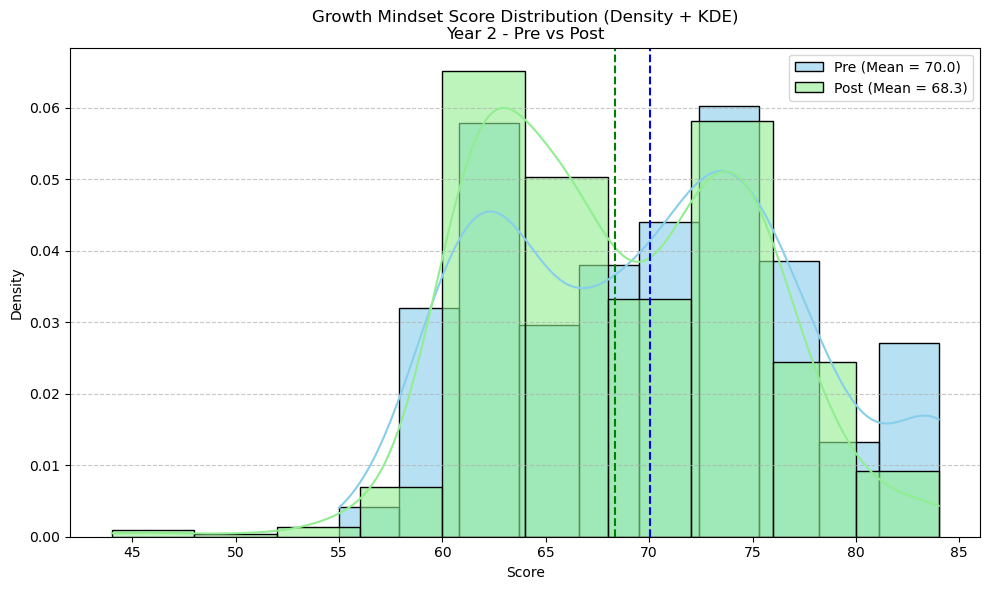

In [119]:
# Re-filter Year 2 Pre and Post so they include the latest columns
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")]
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")]


# Calculate means
mean_pre = df_y2_pre["mindset_score"].mean()
mean_post = df_y2_post["mindset_score"].mean()

# Create figure
plt.figure(figsize=(10, 6))

# Plot histograms with density
sns.histplot(df_y2_pre["mindset_score"].dropna(), bins=10, color='skyblue', label=f'Pre (Mean = {mean_pre:.1f})',
             kde=True, stat="density", alpha=0.6, edgecolor='black')

sns.histplot(df_y2_post["mindset_score"].dropna(), bins=10, color='lightgreen', label=f'Post (Mean = {mean_post:.1f})',
             kde=True, stat="density", alpha=0.6, edgecolor='black')

# Add vertical lines for means
plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_post, color='green', linestyle='dashed', linewidth=1.5)

# Labels and formatting
plt.title("Growth Mindset Score Distribution (Density + KDE)\nYear 2 - Pre vs Post")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [120]:
# Create a dictionary of descriptive stats
summary = {
    "Y2_Pre": df_y2_pre["mindset_score"].describe(),
    "Y2_Post": df_y2_post["mindset_score"].describe()
}

# Convert to a DataFrame for a tidy summary
summary_df = pd.DataFrame(summary)

# Transpose for better readability (optional)
summary_df = summary_df.T  # Rows become conditions, columns are stats

# Display the combined summary
summary_df

,count,mean,std,min,25%,50%,75%,max
Y2_Pre,572.0,70.024476,7.301088,55.0,63.0,70.5,75.0,84.0
Y2_Post,572.0,68.325175,6.414126,44.0,63.0,67.5,74.0,84.0


In [121]:
# Filter Year 1 - Pre and keep only 'id' and 'mindset_score'
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")] 
df_y2_pre = df_y2_pre[["id", "mindset_score"]]                  
df_y2_pre = df_y2_pre.rename(columns={"mindset_score": "mindset_pre"}) 
                                                           

# Filter Year 1 - Post and keep only 'id' and 'mindset_score'
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")] 
df_y2_post = df_y2_post[["id", "mindset_score"]]                   
df_y2_post = df_y2_post.rename(columns={"mindset_score": "mindset_post"}) 

# Merge Pre and Post datasets on 'id'
merged_df = pd.merge(df_y2_pre, df_y2_post, on="id", how="inner") 
                                                                       
                                                                       

# Drop rows with missing values in either score column
paired_data = merged_df.dropna(subset=["mindset_pre", "mindset_post"])
                                                                                 
                                                                                
# Run the Wilcoxon signed-rank test
stat, p_value = wilcoxon(
    paired_data["mindset_pre"],
    paired_data["mindset_post"]
)

# Display the test statistic and p-value
print("Wilcoxon Test Statistic:", stat)
print("p-value:", p_value)

Wilcoxon Test Statistic: 54457.0
p-value: 4.748348325368698e-06


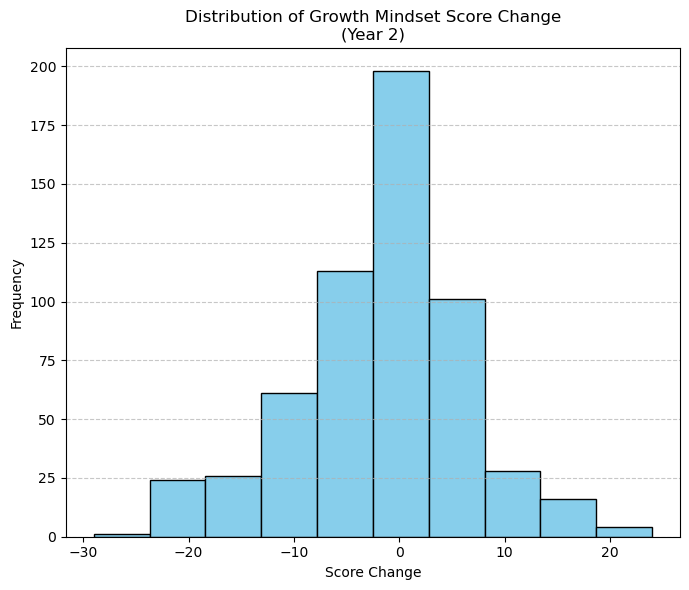

In [122]:
# GROWTH MINDSET SCORE CHANGE IN YEAR 2

# Filter Year 1 Pre and Post data
df_y2_pre = df[(df["year"] == "year2") & (df["time_lsa"] == "pre")]
df_y2_post = df[(df["year"] == "year2") & (df["time_lsa"] == "post")]

# Select and rename relevant columns
df_y2_pre = df_y2_pre[["id", "mindset_score"]].rename(
    columns={
        "mindset_score": "mindset_pre"
    }
)

df_y2_post = df_y2_post[["id", "mindset_score"]].rename(
    columns={
        "mindset_score": "mindset_post"
    }
)

# Merge Pre and Post datasets on 'id'
df_y2_merged = pd.merge(df_y2_pre, df_y2_post, on="id", how="inner")

# Drop rows with missing values
df_y2_merged = df_y2_merged.dropna(subset=["mindset_pre", "mindset_post"])

# Compute change scores
df_y2_merged["mindset_change"] = df_y2_merged["mindset_post"] - df_y2_merged["mindset_pre"]


# Create an histograms for Growth mindset change in score for year 2


fig, ax = plt.subplots(figsize=(7, 6))

ax.hist(df_y2_merged["mindset_change"].dropna(), bins=10, edgecolor='black', color='skyblue')
ax.set_title("Distribution of Growth Mindset Score Change\n(Year 2)")
ax.set_xlabel("Score Change")
ax.set_ylabel("Frequency")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


__Question: What percentage of youth have improved growth mindset in year 2 ?__

In [124]:
# Count of improved growth mindset  scores (score_change > 0)
num_improved_mindset = (df_y2_merged['mindset_change'] > 0).sum()
# Total number of observations of growth mindset score
total_mindset = df_y2_merged['mindset_change'].count()
# Proportion who improved mindset score 
proportion_improved_mindset  = num_improved_mindset / total_mindset

print(f"Proportion of youth who improved growth mindset  socre in year 2 : {proportion_improved_mindset:.2%}")

Proportion of youth who improved growth mindset  socre in year 2 : 39.86%


### 🧠 Insights from Growth mindset Score for Year 2

✅ Mean Scores (Vertical Dashed Lines): Pre (blue line): ~70.0   Post (green line): ~68.3
The post score is slightly lower than the pre score, which is not what you might expect if the intervention aimed to improve mindset.


✅ Both distributions are fairly similar in shape, roughly bell-shaped.The post-intervention distribution (green) is slightly shifted left, suggesting a small decline.Overlap Between Distributions.

✅ There’s a significant overlap between the two curves, which suggests that most participants didn’t experience a large change — and any shift is likely minimal.

✅ Spread: Both pre and post scores seem to cluster between 60 and 80, with some outliers toward 45–55 in the post scores.

✅ Statistically Significant Decline (Wilcoxon Test)

Wilcox.5 p-value4.748348325368698e-06¹⁰

This very low p-value confirms that the decline is statistically significant — it is highly unlikely to be due to chance.

🔍Conclusion The Year 2 data shows a statistically significant and meaningful decligrowth mindsetbility scores following the intervention. Unlike Year 1, where we observed modest gains, Year 2 outcomes suggest that the program may not have been as effective — or that contextual factors influenced performance negatively. Further exploration by subgroup or implementation differences may help explain this trend. ​